# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("test_datasets/Preprocessing_Data_Purchased.csv")
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[:, 1:3]) #include only numerical columns
X[:, 1:3] = imputer.transform(X[:, 1:3])

## Endoding Independent Categorical Variable

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0])], 
    remainder='passthrough')

X = np.array(ct.fit_transform(X))

## Endoding Dependent Categorical Variable

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #no need to specify because y is only one column

y = le.fit_transform(y) #no/yes transform to 0/1

## Training & Test Splitting

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.fit_transform(X_test[:, 3:])

# Regression Models

## Simple Linear Regression

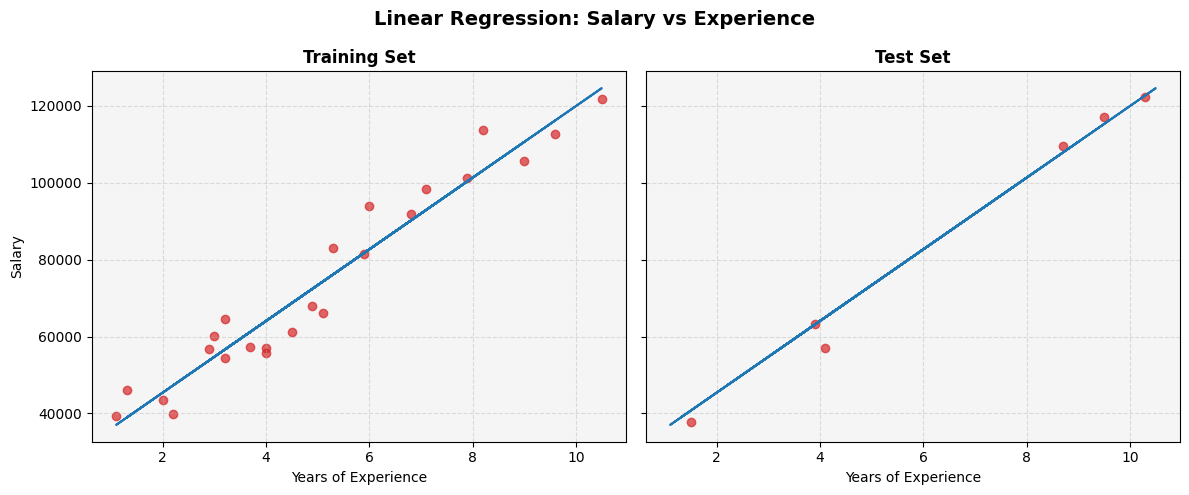

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# -------------------
# Load data
# -------------------
df = pd.read_csv("test_datasets/Linear_Regression_Data.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# -------------------
# Train / Test Split
# -------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# -------------------
# Train model
# -------------------
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# -------------------
# Subplots
# -------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Training Set ---
axes[0].scatter(X_train, y_train, color="tab:red", alpha=0.7)
axes[0].plot(
    X_train,
    regressor.predict(X_train),
    color="tab:blue",
    linewidth=1.5,
    linestyle="-"
)
axes[0].set_title("Training Set", fontweight="bold")
axes[0].set_xlabel("Years of Experience")
axes[0].set_ylabel("Salary")
axes[0].set_facecolor("whitesmoke")

# --- Test Set ---
axes[1].scatter(X_test, y_test, color="tab:red", alpha=0.7)
axes[1].plot(
    X_train,
    regressor.predict(X_train),
    color="tab:blue",
    linewidth=1.5,
    linestyle="-"
)
axes[1].set_title("Test Set", fontweight="bold")
axes[1].set_xlabel("Years of Experience")
axes[1].set_facecolor("whitesmoke")

# Grid for better readability
for ax in axes:
    ax.grid(True, linestyle="--", alpha=0.4)

plt.suptitle(
    "Linear Regression: Salary vs Experience",
    fontsize=14,
    fontweight="bold"
)

plt.tight_layout()
plt.show()

## Multiple Regression

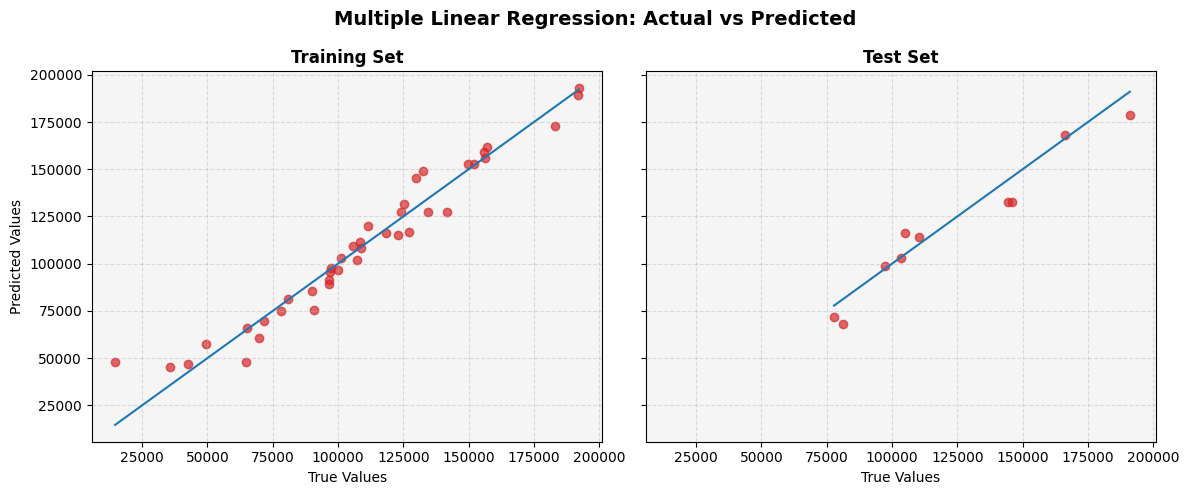

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# -------------------
# Load data
# -------------------
df = pd.read_csv("test_datasets/Multiple_Regression_Data.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# -------------------
# Encoding Categorical Data
# -------------------

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])], 
    remainder='passthrough')

X = np.array(ct.fit_transform(X))

# -------------------
# Train / Test Split
# -------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
# -------------------
# Train model
# -------------------
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# -------------------
# Predictions
# -------------------
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# -------------------
# Plot
# -------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# --- Training Set ---
axes[0].scatter(
    y_train,
    y_train_pred,
    color="tab:red",
    alpha=0.7
)
axes[0].plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color="tab:blue",
    linestyle="-",
    linewidth=1.5
)
axes[0].set_title("Training Set", fontweight="bold")
axes[0].set_xlabel("True Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_facecolor("whitesmoke")
axes[0].grid(True, linestyle="--", alpha=0.4)

# --- Test Set ---
axes[1].scatter(
    y_test,
    y_test_pred,
    color="tab:red",
    alpha=0.7
)
axes[1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="tab:blue",
    linestyle="-",
    linewidth=1.5
)
axes[1].set_title("Test Set", fontweight="bold")
axes[1].set_xlabel("True Values")
axes[1].set_facecolor("whitesmoke")
axes[1].grid(True, linestyle="--", alpha=0.4)

plt.suptitle(
    "Multiple Linear Regression: Actual vs Predicted",
    fontsize=14,
    fontweight="bold"
)

plt.tight_layout()
plt.show()

## Polynomial Regression

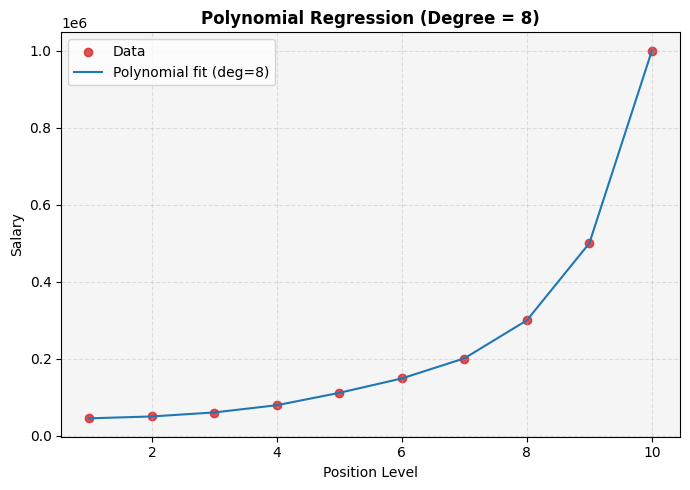

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# -------------------
# Load data
# -------------------
df = pd.read_csv("test_datasets/Polynomial_Regression_Data.csv")
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# -------------------
# Train polynomial model on whole data
# -------------------
poly_reg = PolynomialFeatures(degree=8)
X_poly = poly_reg.fit_transform(X)

regressor = LinearRegression()
regressor.fit(X_poly, y)

# -------------------
# Prediction
# -------------------
y_pred = regressor.predict(poly_reg.transform(X))

# -------------------
# Plot 
# -------------------
plt.figure(figsize=(7, 5))
plt.scatter(X, y, color="tab:red", alpha=0.8, label="Data")
plt.plot(X, y_pred, color="tab:blue", linewidth=1.5, label="Polynomial fit (deg=8)")

plt.title("Polynomial Regression (Degree = 8)", fontweight="bold")
plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend()

plt.tight_layout()
plt.show()

## Support Vector Regression (SVR)

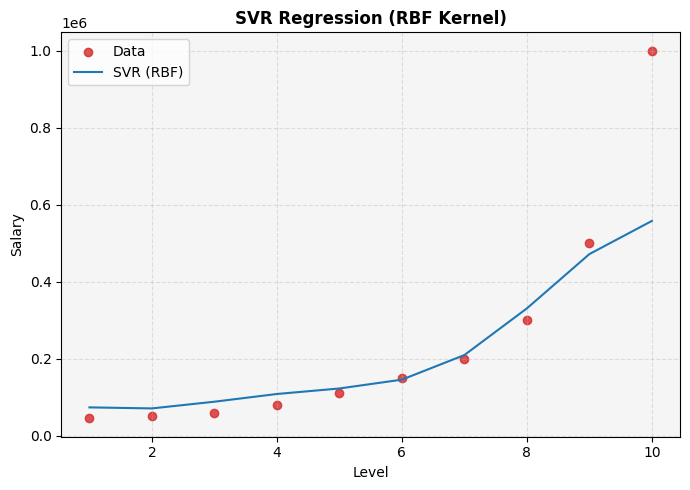

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# -------------------
# Load data
# -------------------
df = pd.read_csv("test_datasets/Polynomial_Regression_Data.csv")

X = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:, -1].values.reshape(-1, 1)

# -------------------
# Feature Scaling
# -------------------
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y).ravel()   # SVR needs 1D-Array

# -------------------
# Model Training (SVR)
# -------------------
regressor = SVR(kernel="rbf")
regressor.fit(X_scaled, y_scaled)

# -------------------
# Prediction
# -------------------
y_pred_scaled = regressor.predict(X_scaled).reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred_scaled)

# -------------------
# Plot
# -------------------
plt.figure(figsize=(7, 5))

plt.scatter(
    X,
    y,
    color="tab:red",
    alpha=0.8,
    label="Data"
)

plt.plot(
    X,
    y_pred,
    color="tab:blue",
    linewidth=1.5,
    label="SVR (RBF)"
)

plt.title("SVR Regression (RBF Kernel)", fontweight="bold")
plt.xlabel(df.columns[1])      
plt.ylabel(df.columns[-1])

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()

## Decision Tree Regression

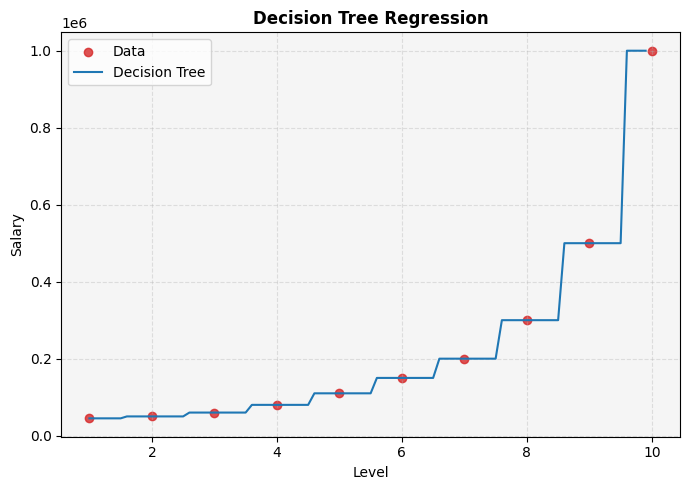

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeRegressor

# -------------------
# Load data
# -------------------
df = pd.read_csv("test_datasets/Polynomial_Regression_Data.csv")

X = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:, -1].values

# -------------------
# Model Training
# -------------------
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# -------------------
# Prediction
# -------------------
X_grid = np.arange(X.min(), X.max(), 0.1).reshape(-1, 1)
y_pred = regressor.predict(X_grid)

# -------------------
# Plot
# -------------------
plt.figure(figsize=(7, 5))

plt.scatter(
    X,
    y,
    color="tab:red",
    alpha=0.8,
    label="Data"
)

plt.plot(
    X_grid,
    y_pred,
    color="tab:blue",
    linewidth=1.5,
    label="Decision Tree"
)

plt.title("Decision Tree Regression", fontweight="bold")
plt.xlabel(df.columns[1])      
plt.ylabel(df.columns[-1])

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()

## Random Forest Regression

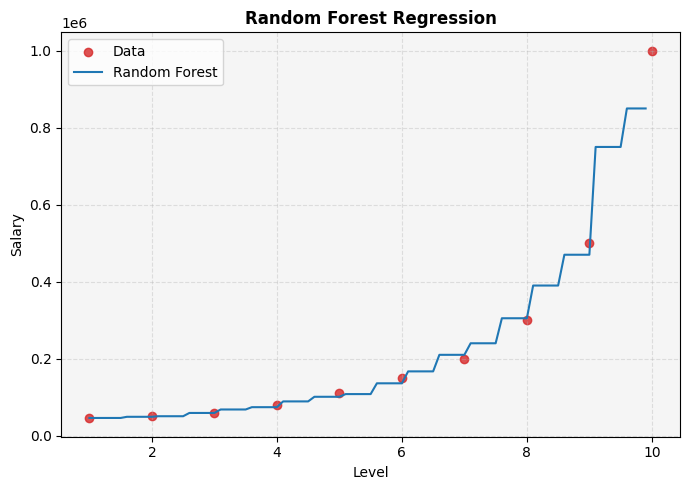

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

# -------------------
# Load data
# -------------------
df = pd.read_csv("test_datasets/Polynomial_Regression_Data.csv")

X = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:, -1].values

# -------------------
# Model Training
# -------------------
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

# -------------------
# Prediction
# -------------------
X_grid = np.arange(X.min(), X.max(), 0.1).reshape(-1, 1)
y_pred = regressor.predict(X_grid)

# -------------------
# Plot
# -------------------
plt.figure(figsize=(7, 5))

plt.scatter(
    X,
    y,
    color="tab:red",
    alpha=0.8,
    label="Data"
)

plt.plot(
    X_grid,
    y_pred,
    color="tab:blue",
    linewidth=1.5,
    label="Random Forest"
)

plt.title("Random Forest Regression", fontweight="bold")
plt.xlabel(df.columns[1])      
plt.ylabel(df.columns[-1])

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()

# Classification Models

## Logistic Regression

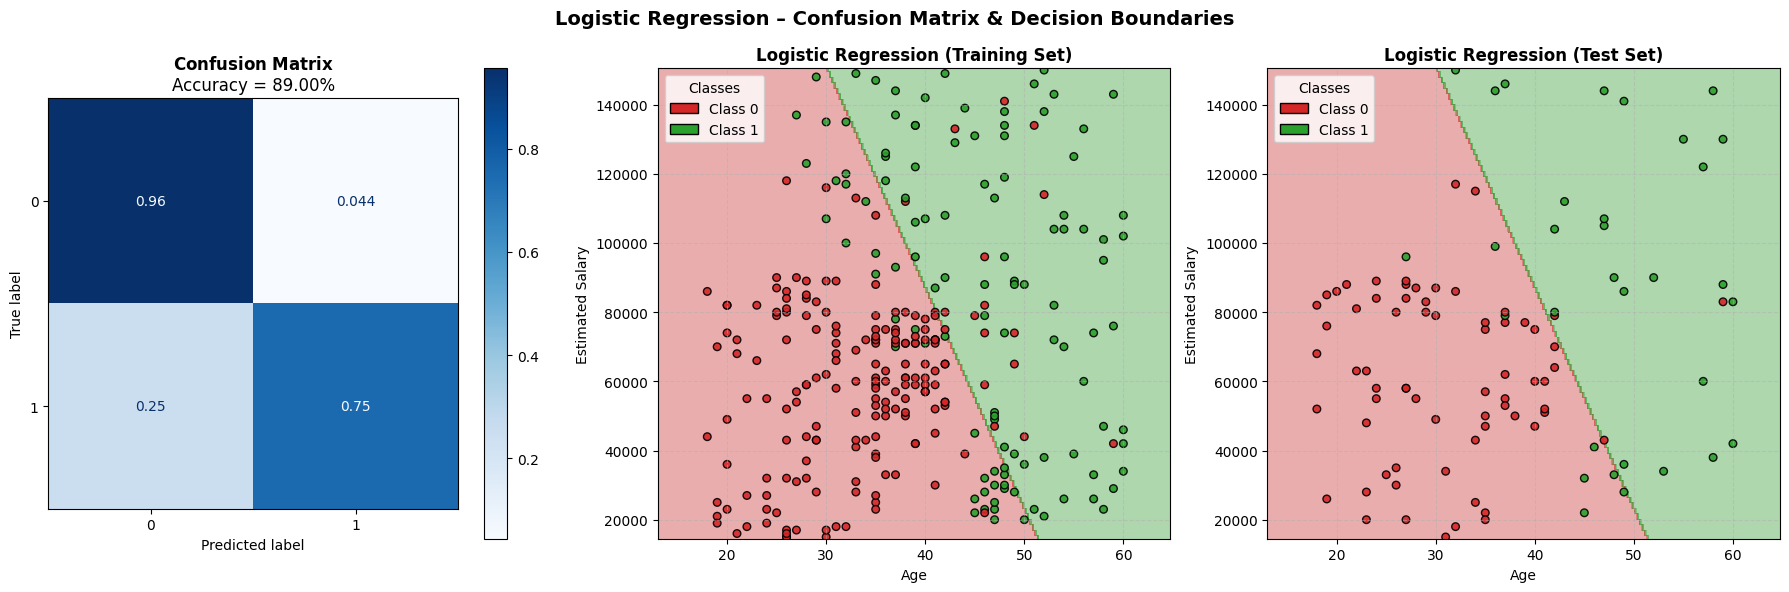

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score


# =====================================================
# Load data
# =====================================================
df = pd.read_csv("test_datasets/Logistic_Regression_Data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# =====================================================
# Train / Test Split
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# =====================================================
# Feature Scaling
# =====================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# =====================================================
# Train Model
# =====================================================
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


# =====================================================
# Predictions & Accuracy
# =====================================================
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)


# =====================================================
# Helper: Decision Boundary Plot
# =====================================================
def plot_decision_boundary(X, y, model, scaler, ax, title):
    X_vis = scaler.inverse_transform(X)

    cmap = ListedColormap(("tab:red", "tab:green"))

    x1_min, x1_max = X_vis[:, 0].min() - 5, X_vis[:, 0].max() + 5
    x2_min, x2_max = X_vis[:, 1].min() - 500, X_vis[:, 1].max() + 500

    X1, X2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.25),
        np.arange(x2_min, x2_max, 0.25),
    )

    grid = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(scaler.transform(grid)).reshape(X1.shape)

    ax.contourf(X1, X2, Z, alpha=0.35, cmap=cmap)
    ax.scatter(
        X_vis[:, 0],
        X_vis[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.9,
        edgecolor="k",
        s=30,
    )

    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Age")
    ax.set_ylabel("Estimated Salary")
    ax.set_facecolor("whitesmoke")
    ax.grid(True, linestyle="--", alpha=0.5)

    legend_elements = [
        Patch(facecolor="tab:red", edgecolor="k", label="Class 0"),
        Patch(facecolor="tab:green", edgecolor="k", label="Class 1"),
    ]
    ax.legend(handles=legend_elements, title="Classes")


# =====================================================
# Visualization
# =====================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Confusion Matrix ---
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=axes[0],
    cmap=plt.cm.Blues,
    normalize="true",
    colorbar=True,
)
axes[0].set_title(
    r"$\bf{Confusion\ Matrix}$" + f"\nAccuracy = {acc:.2%}"
)
axes[0].set_facecolor("whitesmoke")


# --- Training Set ---
plot_decision_boundary(
    X_train,
    y_train,
    classifier,
    scaler,
    axes[1],
    "Logistic Regression (Training Set)",
)


# --- Test Set ---
plot_decision_boundary(
    X_test,
    y_test,
    classifier,
    scaler,
    axes[2],
    "Logistic Regression (Test Set)",
)


plt.suptitle(
    "Logistic Regression – Confusion Matrix & Decision Boundaries",
    fontsize=14,
    fontweight="bold",
)

plt.tight_layout()
plt.show()

## K-NN Regression

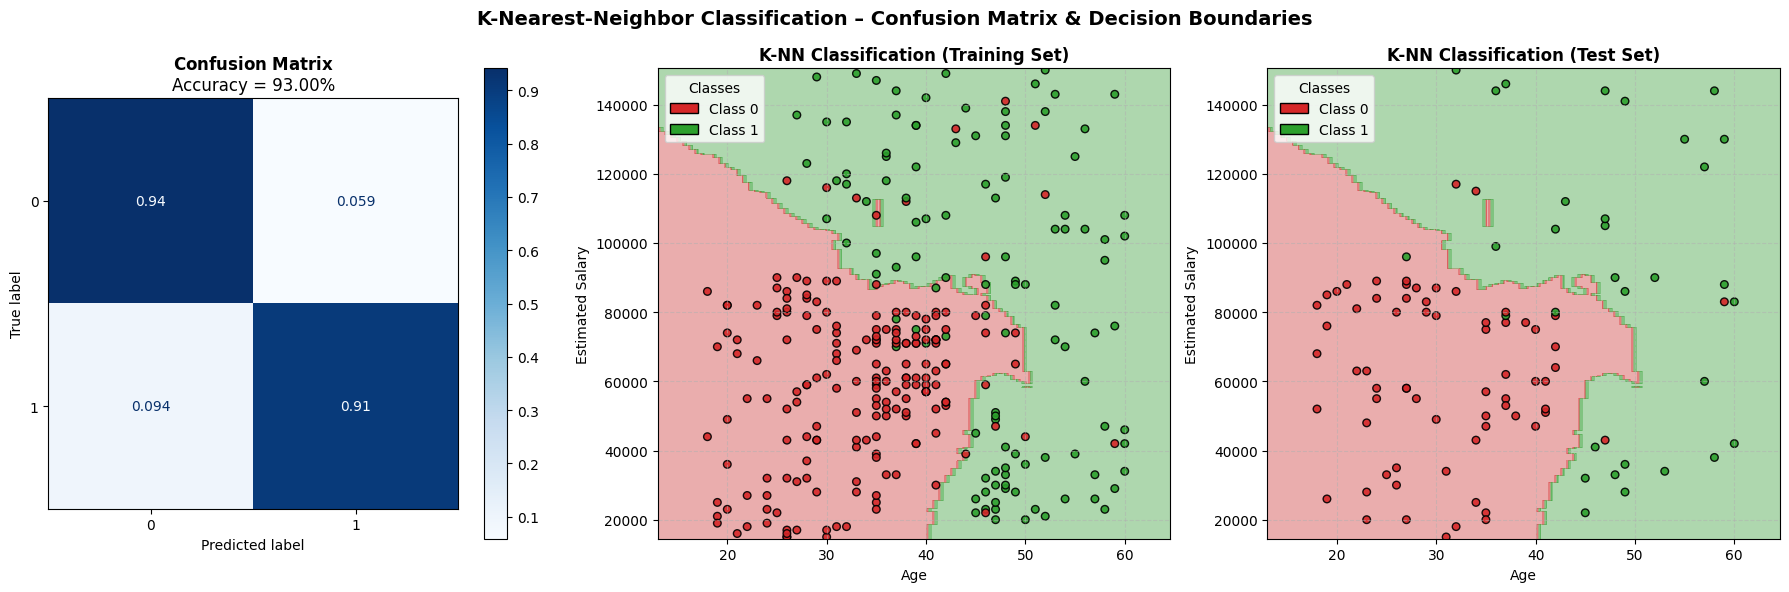

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score


# =====================================================
# Load data
# =====================================================
df = pd.read_csv("test_datasets/Logistic_Regression_Data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# =====================================================
# Train / Test Split
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# =====================================================
# Feature Scaling
# =====================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# =====================================================
# Train Model
# =====================================================
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)


# =====================================================
# Predictions & Accuracy
# =====================================================
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)


# =====================================================
# Helper: Decision Boundary Plot
# =====================================================
def plot_decision_boundary(X, y, model, scaler, ax, title):
    X_vis = scaler.inverse_transform(X)

    cmap = ListedColormap(("tab:red", "tab:green"))

    x1_min, x1_max = X_vis[:, 0].min() - 5, X_vis[:, 0].max() + 5
    x2_min, x2_max = X_vis[:, 1].min() - 500, X_vis[:, 1].max() + 500

    X1, X2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.6), # optimize for available memory usage
        np.arange(x2_min, x2_max, 0.6), # optimize for available memory usage
    )

    grid = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(scaler.transform(grid)).reshape(X1.shape)

    ax.contourf(X1, X2, Z, alpha=0.35, cmap=cmap)
    ax.scatter(
        X_vis[:, 0],
        X_vis[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.9,
        edgecolor="k",
        s=30,
    )

    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Age")
    ax.set_ylabel("Estimated Salary")
    ax.set_facecolor("whitesmoke")
    ax.grid(True, linestyle="--", alpha=0.5)

    legend_elements = [
        Patch(facecolor="tab:red", edgecolor="k", label="Class 0"),
        Patch(facecolor="tab:green", edgecolor="k", label="Class 1"),
    ]
    ax.legend(handles=legend_elements, title="Classes")


# =====================================================
# Visualization
# =====================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Confusion Matrix ---
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=axes[0],
    cmap=plt.cm.Blues,
    normalize="true",
    colorbar=True,
)
axes[0].set_title(
    r"$\bf{Confusion\ Matrix}$" + f"\nAccuracy = {acc:.2%}"
)
axes[0].set_facecolor("whitesmoke")


# --- Training Set ---
plot_decision_boundary(
    X_train,
    y_train,
    classifier,
    scaler,
    axes[1],
    "K-NN Classification (Training Set)",
)


# --- Test Set ---
plot_decision_boundary(
    X_test,
    y_test,
    classifier,
    scaler,
    axes[2],
    "K-NN Classification (Test Set)",
)


plt.suptitle(
    "K-Nearest-Neighbor Classification – Confusion Matrix & Decision Boundaries",
    fontsize=14,
    fontweight="bold",
)

plt.tight_layout()
plt.show()

## Support Vector Machine Classification (SVM)

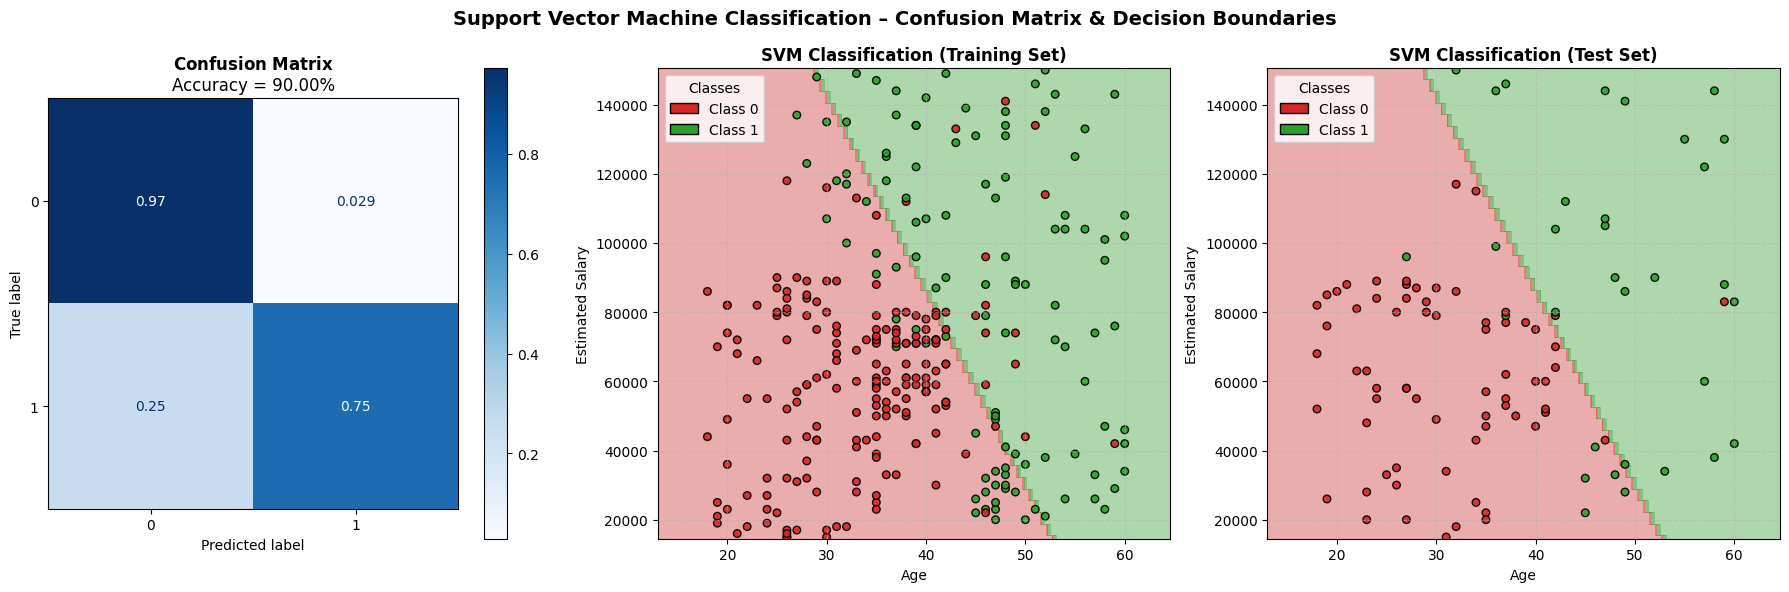

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score


# =====================================================
# Load data
# =====================================================
df = pd.read_csv("test_datasets/Logistic_Regression_Data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# =====================================================
# Train / Test Split
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# =====================================================
# Feature Scaling
# =====================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# =====================================================
# Train Model
# =====================================================
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)


# =====================================================
# Predictions & Accuracy
# =====================================================
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)


# =====================================================
# Helper: Decision Boundary Plot
# =====================================================
def plot_decision_boundary(X, y, model, scaler, ax, title):
    X_vis = scaler.inverse_transform(X)

    cmap = ListedColormap(("tab:red", "tab:green"))

    x1_min, x1_max = X_vis[:, 0].min() - 5, X_vis[:, 0].max() + 5
    x2_min, x2_max = X_vis[:, 1].min() - 500, X_vis[:, 1].max() + 500

    X1, X2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.6), # optimize for available memory usage
        np.arange(x2_min, x2_max, 0.6), # optimize for available memory usage
    )

    grid = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(scaler.transform(grid)).reshape(X1.shape)

    ax.contourf(X1, X2, Z, alpha=0.35, cmap=cmap)
    ax.scatter(
        X_vis[:, 0],
        X_vis[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.9,
        edgecolor="k",
        s=30,
    )

    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Age")
    ax.set_ylabel("Estimated Salary")
    ax.set_facecolor("whitesmoke")
    ax.grid(True, linestyle="--", alpha=0.5)

    legend_elements = [
        Patch(facecolor="tab:red", edgecolor="k", label="Class 0"),
        Patch(facecolor="tab:green", edgecolor="k", label="Class 1"),
    ]
    ax.legend(handles=legend_elements, title="Classes")


# =====================================================
# Visualization
# =====================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Confusion Matrix ---
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=axes[0],
    cmap=plt.cm.Blues,
    normalize="true",
    colorbar=True,
)
axes[0].set_title(
    r"$\bf{Confusion\ Matrix}$" + f"\nAccuracy = {acc:.2%}"
)
axes[0].set_facecolor("whitesmoke")


# --- Training Set ---
plot_decision_boundary(
    X_train,
    y_train,
    classifier,
    scaler,
    axes[1],
    "SVM Classification (Training Set)",
)


# --- Test Set ---
plot_decision_boundary(
    X_test,
    y_test,
    classifier,
    scaler,
    axes[2],
    "SVM Classification (Test Set)",
)


plt.suptitle(
    "Support Vector Machine Classification – Confusion Matrix & Decision Boundaries",
    fontsize=14,
    fontweight="bold",
)

plt.tight_layout()
plt.show()

## SVM rbf-Kernel Classification

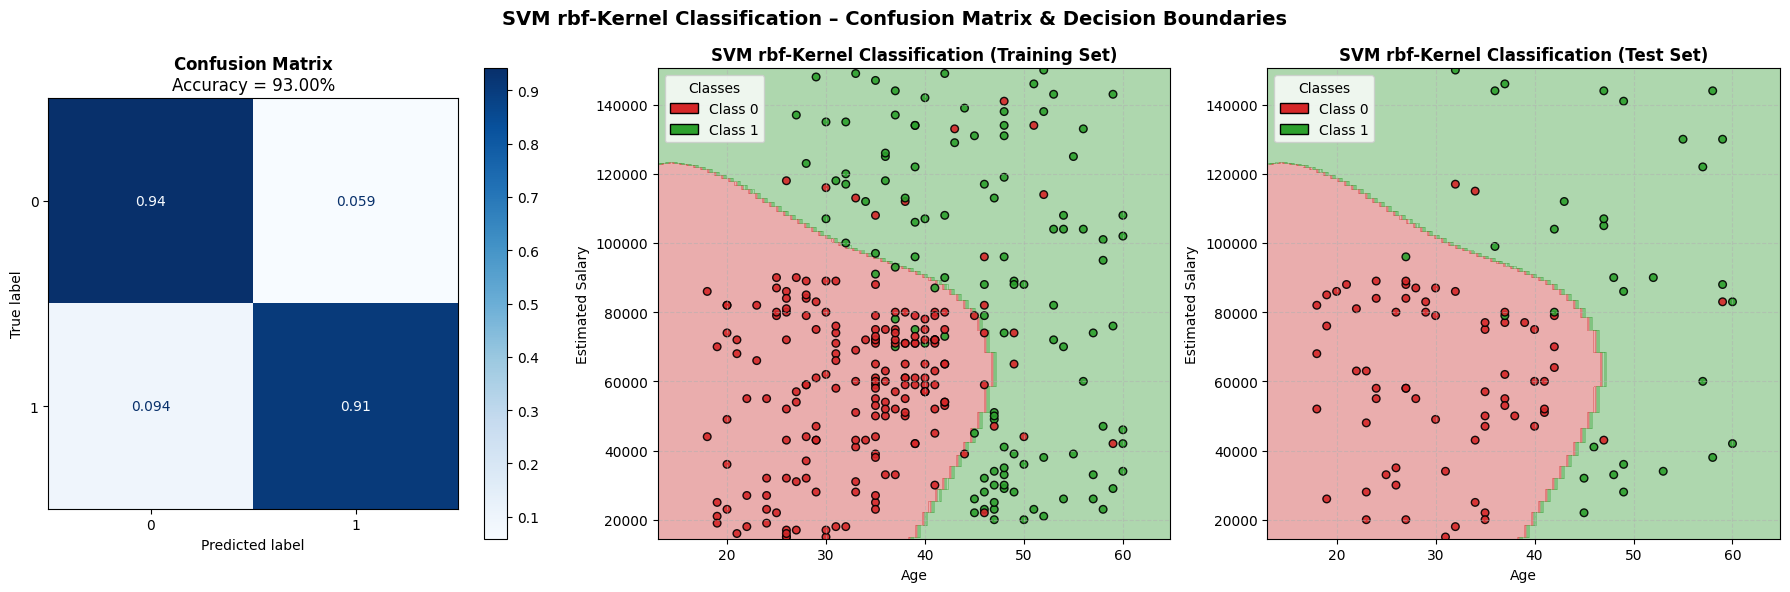

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score


# =====================================================
# Load data
# =====================================================
df = pd.read_csv("test_datasets/Logistic_Regression_Data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# =====================================================
# Train / Test Split
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# =====================================================
# Feature Scaling
# =====================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# =====================================================
# Train Model
# =====================================================
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)


# =====================================================
# Predictions & Accuracy
# =====================================================
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)


# =====================================================
# Helper: Decision Boundary Plot
# =====================================================
def plot_decision_boundary(X, y, model, scaler, ax, title):
    X_vis = scaler.inverse_transform(X)

    cmap = ListedColormap(("tab:red", "tab:green"))

    x1_min, x1_max = X_vis[:, 0].min() - 5, X_vis[:, 0].max() + 5
    x2_min, x2_max = X_vis[:, 1].min() - 500, X_vis[:, 1].max() + 500

    X1, X2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.7), # optimize for available memory usage
        np.arange(x2_min, x2_max, 0.7), # optimize for available memory usage
    )

    grid = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(scaler.transform(grid)).reshape(X1.shape)

    ax.contourf(X1, X2, Z, alpha=0.35, cmap=cmap)
    ax.scatter(
        X_vis[:, 0],
        X_vis[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.9,
        edgecolor="k",
        s=30,
    )

    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Age")
    ax.set_ylabel("Estimated Salary")
    ax.set_facecolor("whitesmoke")
    ax.grid(True, linestyle="--", alpha=0.5)

    legend_elements = [
        Patch(facecolor="tab:red", edgecolor="k", label="Class 0"),
        Patch(facecolor="tab:green", edgecolor="k", label="Class 1"),
    ]
    ax.legend(handles=legend_elements, title="Classes")


# =====================================================
# Visualization
# =====================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Confusion Matrix ---
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=axes[0],
    cmap=plt.cm.Blues,
    normalize="true",
    colorbar=True,
)
axes[0].set_title(
    r"$\bf{Confusion\ Matrix}$" + f"\nAccuracy = {acc:.2%}"
)
axes[0].set_facecolor("whitesmoke")


# --- Training Set ---
plot_decision_boundary(
    X_train,
    y_train,
    classifier,
    scaler,
    axes[1],
    "SVM rbf-Kernel Classification (Training Set)",
)


# --- Test Set ---
plot_decision_boundary(
    X_test,
    y_test,
    classifier,
    scaler,
    axes[2],
    "SVM rbf-Kernel Classification (Test Set)",
)


plt.suptitle(
    "SVM rbf-Kernel Classification – Confusion Matrix & Decision Boundaries",
    fontsize=14,
    fontweight="bold",
)

plt.tight_layout()
plt.show()

## Naive Bayes Classification

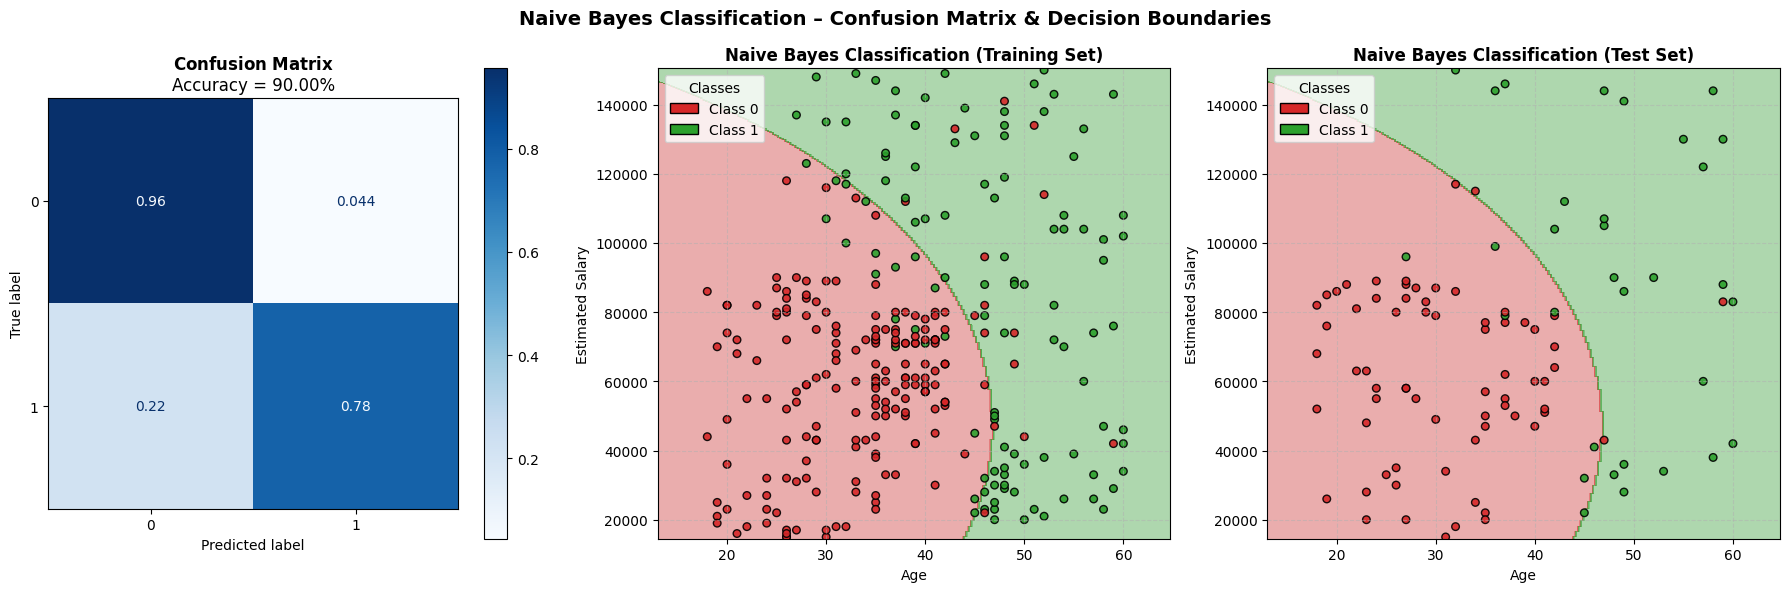

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score


# =====================================================
# Load data
# =====================================================
df = pd.read_csv("test_datasets/Logistic_Regression_Data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# =====================================================
# Train / Test Split
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# =====================================================
# Feature Scaling
# =====================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# =====================================================
# Train Model
# =====================================================
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# =====================================================
# Predictions & Accuracy
# =====================================================
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)


# =====================================================
# Helper: Decision Boundary Plot
# =====================================================
def plot_decision_boundary(X, y, model, scaler, ax, title):
    X_vis = scaler.inverse_transform(X)

    cmap = ListedColormap(("tab:red", "tab:green"))

    x1_min, x1_max = X_vis[:, 0].min() - 5, X_vis[:, 0].max() + 5
    x2_min, x2_max = X_vis[:, 1].min() - 500, X_vis[:, 1].max() + 500

    X1, X2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.25), # optimize for available memory usage
        np.arange(x2_min, x2_max, 0.25), # optimize for available memory usage
    )

    grid = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(scaler.transform(grid)).reshape(X1.shape)

    ax.contourf(X1, X2, Z, alpha=0.35, cmap=cmap)
    ax.scatter(
        X_vis[:, 0],
        X_vis[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.9,
        edgecolor="k",
        s=30,
    )

    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Age")
    ax.set_ylabel("Estimated Salary")
    ax.set_facecolor("whitesmoke")
    ax.grid(True, linestyle="--", alpha=0.5)

    legend_elements = [
        Patch(facecolor="tab:red", edgecolor="k", label="Class 0"),
        Patch(facecolor="tab:green", edgecolor="k", label="Class 1"),
    ]
    ax.legend(handles=legend_elements, title="Classes")


# =====================================================
# Visualization
# =====================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Confusion Matrix ---
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=axes[0],
    cmap=plt.cm.Blues,
    normalize="true",
    colorbar=True,
)
axes[0].set_title(
    r"$\bf{Confusion\ Matrix}$" + f"\nAccuracy = {acc:.2%}"
)
axes[0].set_facecolor("whitesmoke")


# --- Training Set ---
plot_decision_boundary(
    X_train,
    y_train,
    classifier,
    scaler,
    axes[1],
    "Naive Bayes Classification (Training Set)",
)


# --- Test Set ---
plot_decision_boundary(
    X_test,
    y_test,
    classifier,
    scaler,
    axes[2],
    "Naive Bayes Classification (Test Set)",
)


plt.suptitle(
    "Naive Bayes Classification – Confusion Matrix & Decision Boundaries",
    fontsize=14,
    fontweight="bold",
)

plt.tight_layout()
plt.show()

## Decision Tree Classification

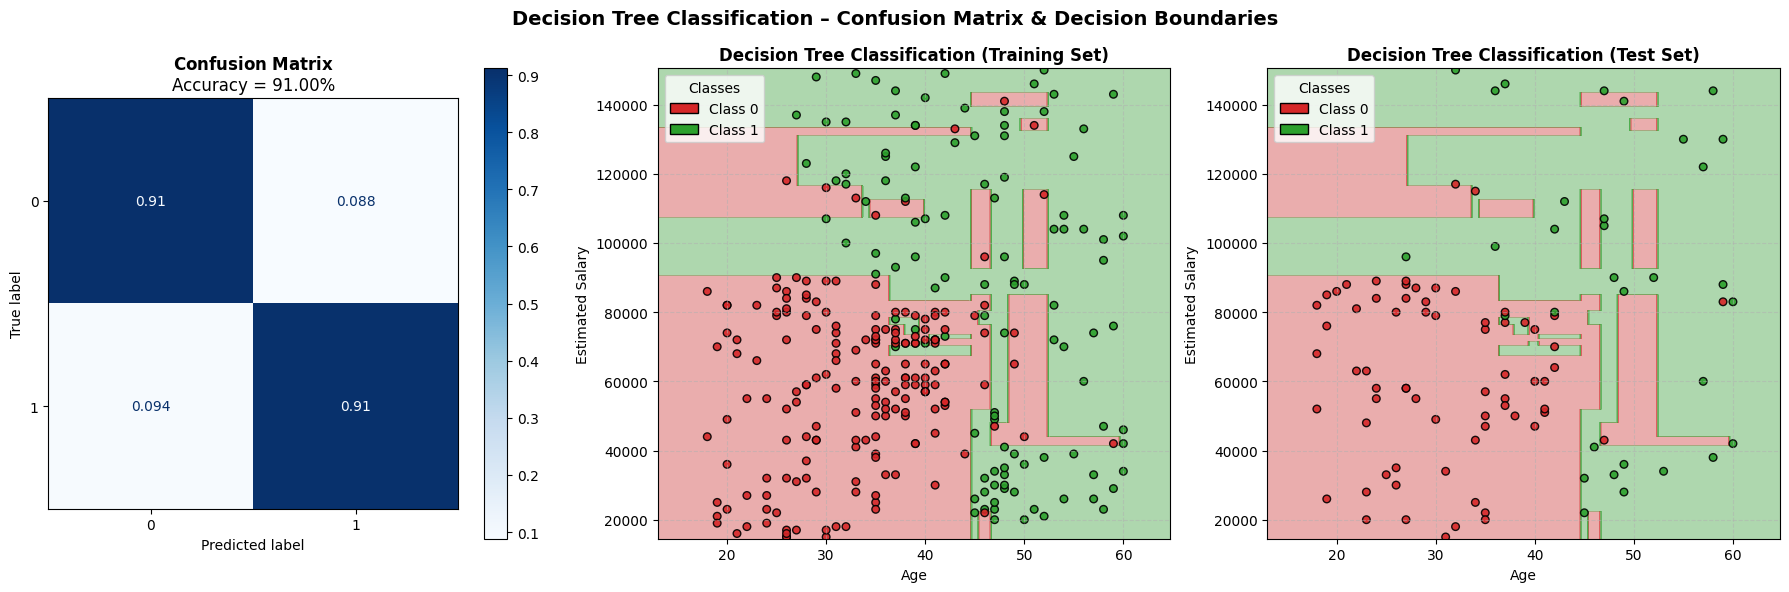

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score


# =====================================================
# Load data
# =====================================================
df = pd.read_csv("test_datasets/Logistic_Regression_Data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# =====================================================
# Train / Test Split
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# =====================================================
# Feature Scaling
# =====================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# =====================================================
# Train Model
# =====================================================
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# =====================================================
# Predictions & Accuracy
# =====================================================
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)


# =====================================================
# Helper: Decision Boundary Plot
# =====================================================
def plot_decision_boundary(X, y, model, scaler, ax, title):
    X_vis = scaler.inverse_transform(X)

    cmap = ListedColormap(("tab:red", "tab:green"))

    x1_min, x1_max = X_vis[:, 0].min() - 5, X_vis[:, 0].max() + 5
    x2_min, x2_max = X_vis[:, 1].min() - 500, X_vis[:, 1].max() + 500

    X1, X2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.25), # optimize for available memory usage
        np.arange(x2_min, x2_max, 0.25), # optimize for available memory usage
    )

    grid = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(scaler.transform(grid)).reshape(X1.shape)

    ax.contourf(X1, X2, Z, alpha=0.35, cmap=cmap)
    ax.scatter(
        X_vis[:, 0],
        X_vis[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.9,
        edgecolor="k",
        s=30,
    )

    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Age")
    ax.set_ylabel("Estimated Salary")
    ax.set_facecolor("whitesmoke")
    ax.grid(True, linestyle="--", alpha=0.5)

    legend_elements = [
        Patch(facecolor="tab:red", edgecolor="k", label="Class 0"),
        Patch(facecolor="tab:green", edgecolor="k", label="Class 1"),
    ]
    ax.legend(handles=legend_elements, title="Classes")


# =====================================================
# Visualization
# =====================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Confusion Matrix ---
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=axes[0],
    cmap=plt.cm.Blues,
    normalize="true",
    colorbar=True,
)
axes[0].set_title(
    r"$\bf{Confusion\ Matrix}$" + f"\nAccuracy = {acc:.2%}"
)
axes[0].set_facecolor("whitesmoke")


# --- Training Set ---
plot_decision_boundary(
    X_train,
    y_train,
    classifier,
    scaler,
    axes[1],
    "Decision Tree Classification (Training Set)",
)


# --- Test Set ---
plot_decision_boundary(
    X_test,
    y_test,
    classifier,
    scaler,
    axes[2],
    "Decision Tree Classification (Test Set)",
)


plt.suptitle(
    "Decision Tree Classification – Confusion Matrix & Decision Boundaries",
    fontsize=14,
    fontweight="bold",
)

plt.tight_layout()
plt.show()

## Random Forest Classification

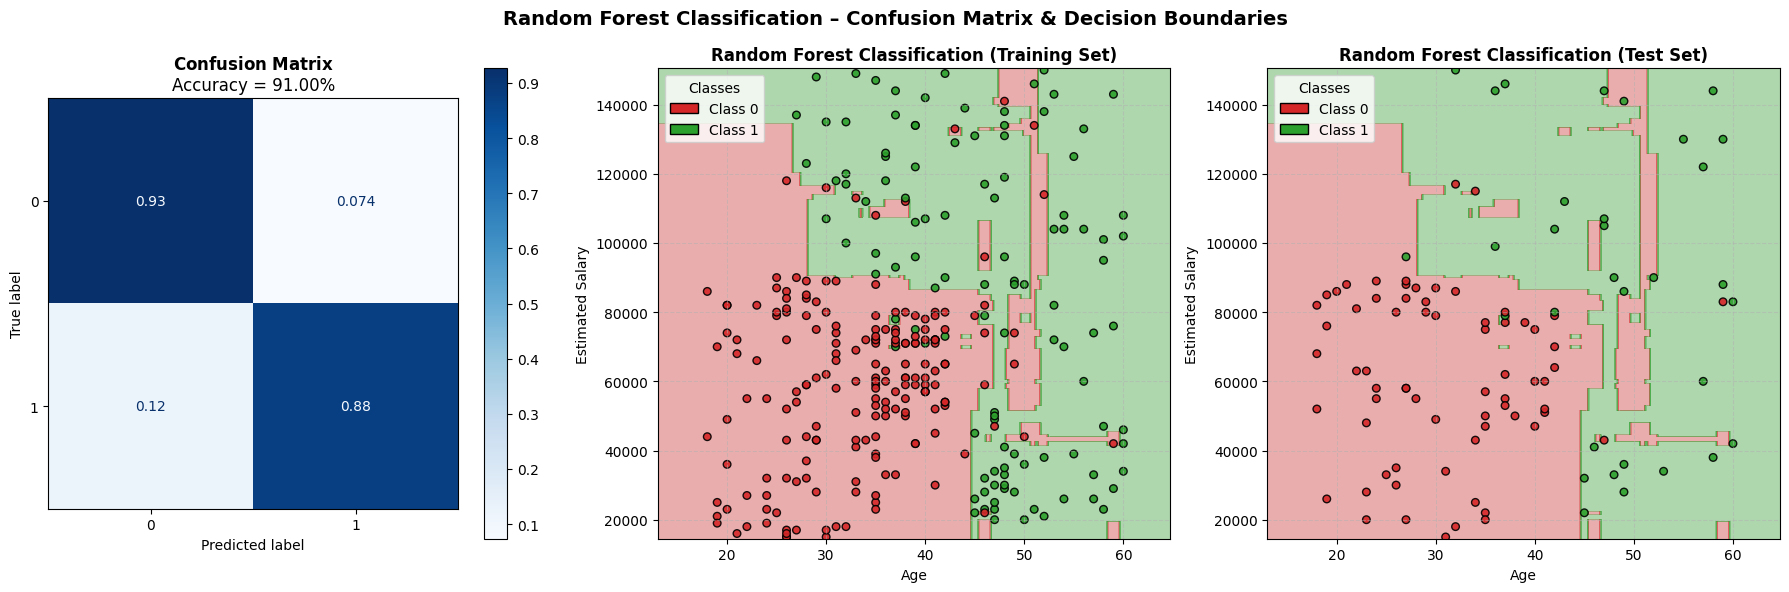

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score


# =====================================================
# Load data
# =====================================================
df = pd.read_csv("test_datasets/Logistic_Regression_Data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# =====================================================
# Train / Test Split
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# =====================================================
# Feature Scaling
# =====================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# =====================================================
# Train Model
# =====================================================
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# =====================================================
# Predictions & Accuracy
# =====================================================
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)


# =====================================================
# Helper: Decision Boundary Plot
# =====================================================
def plot_decision_boundary(X, y, model, scaler, ax, title):
    X_vis = scaler.inverse_transform(X)

    cmap = ListedColormap(("tab:red", "tab:green"))

    x1_min, x1_max = X_vis[:, 0].min() - 5, X_vis[:, 0].max() + 5
    x2_min, x2_max = X_vis[:, 1].min() - 500, X_vis[:, 1].max() + 500

    X1, X2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.25), # optimize for available memory usage
        np.arange(x2_min, x2_max, 0.25), # optimize for available memory usage
    )

    grid = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(scaler.transform(grid)).reshape(X1.shape)

    ax.contourf(X1, X2, Z, alpha=0.35, cmap=cmap)
    ax.scatter(
        X_vis[:, 0],
        X_vis[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.9,
        edgecolor="k",
        s=30,
    )

    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Age")
    ax.set_ylabel("Estimated Salary")
    ax.set_facecolor("whitesmoke")
    ax.grid(True, linestyle="--", alpha=0.5)

    legend_elements = [
        Patch(facecolor="tab:red", edgecolor="k", label="Class 0"),
        Patch(facecolor="tab:green", edgecolor="k", label="Class 1"),
    ]
    ax.legend(handles=legend_elements, title="Classes")


# =====================================================
# Visualization
# =====================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Confusion Matrix ---
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=axes[0],
    cmap=plt.cm.Blues,
    normalize="true",
    colorbar=True,
)
axes[0].set_title(
    r"$\bf{Confusion\ Matrix}$" + f"\nAccuracy = {acc:.2%}"
)
axes[0].set_facecolor("whitesmoke")


# --- Training Set ---
plot_decision_boundary(
    X_train,
    y_train,
    classifier,
    scaler,
    axes[1],
    "Random Forest Classification (Training Set)",
)


# --- Test Set ---
plot_decision_boundary(
    X_test,
    y_test,
    classifier,
    scaler,
    axes[2],
    "Random Forest Classification (Test Set)",
)


plt.suptitle(
    "Random Forest Classification – Confusion Matrix & Decision Boundaries",
    fontsize=14,
    fontweight="bold",
)

plt.tight_layout()
plt.show()

# Classification Model Comparison with Confusion Matrices

This script benchmarks several classical machine learning classifiers  
(Logistic Regression, KNN, SVM, Naive Bayes, Decision Trees, Random Forest)  
using accuracy and normalized confusion matrices.  

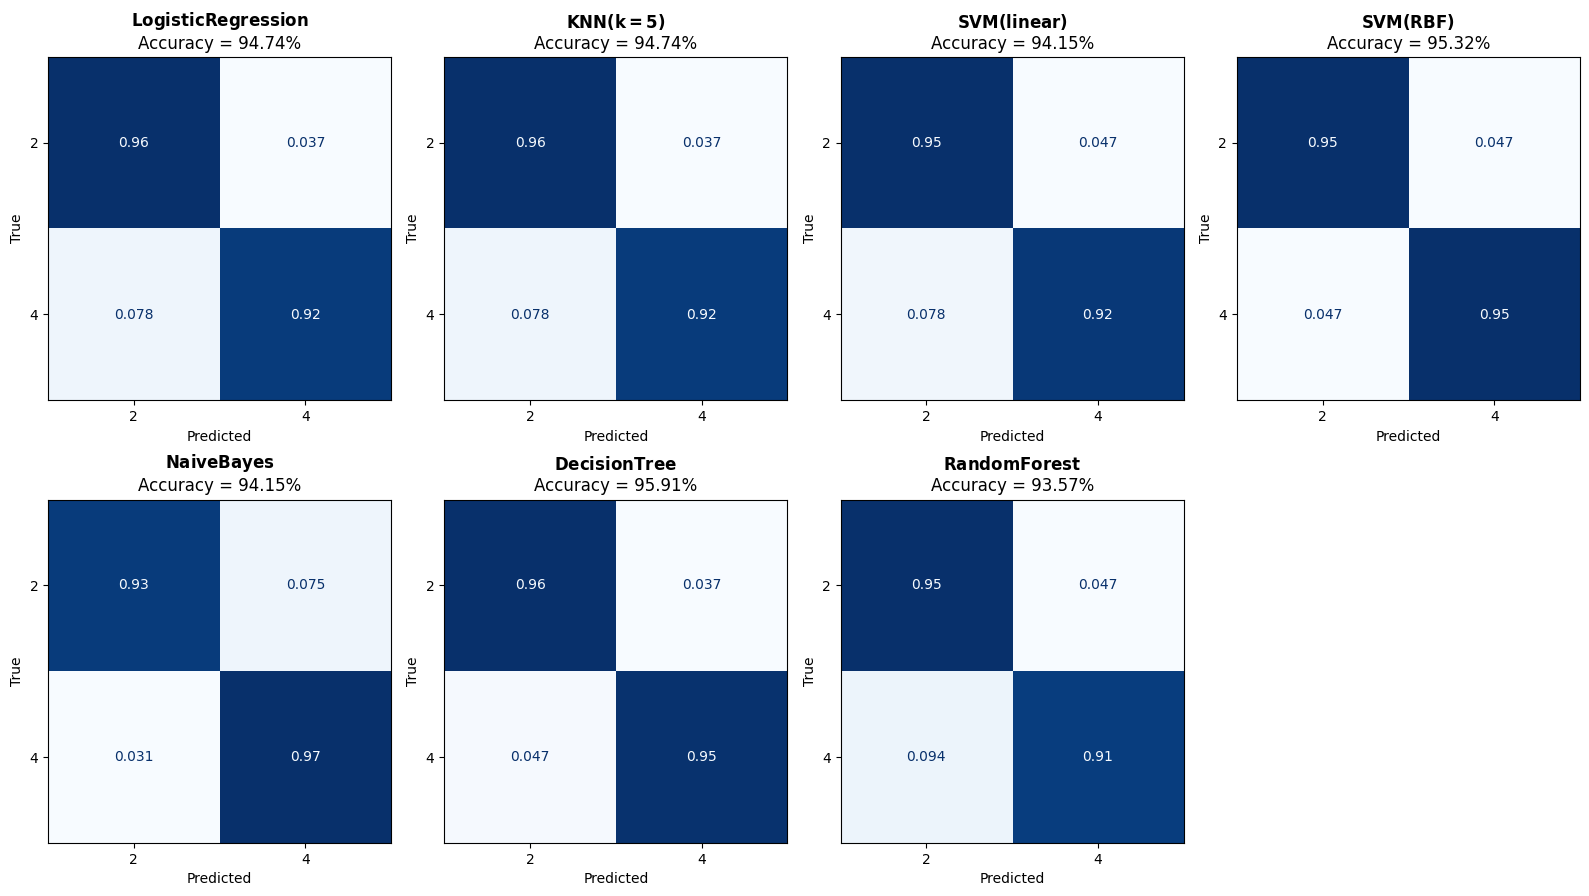

In [9]:
import math
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# -------------------
# Load data
# -------------------
dataset = pd.read_csv("test_datasets/Classification_Data_Cells.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# -------------------
# Define models
# -------------------
models = [
    ("Logistic Regression", LogisticRegression(random_state=0, max_iter=1000)),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)),
    ("SVM (linear)", SVC(kernel="linear", random_state=0)),
    ("SVM (RBF)", SVC(kernel="rbf", random_state=0)),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier(criterion="entropy", random_state=0)),
    (
        "Random Forest",
        RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0),
    ),
]

# -------------------
# Plot confusion matrices in a grid
# -------------------
n_models = len(models)
n_cols = 4
n_rows = math.ceil(n_models / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4.5 * n_rows))
axes = axes.ravel()

for i, (name, model) in enumerate(models):
    ax = axes[i]

    model.fit(X_train, y_train)

    # Accuracy
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, ax=ax, cmap=plt.cm.Blues, normalize="true", colorbar=False
    )
    ax.set_title(rf"$\bf{{{name}}}$" + f"\nAccuracy = {acc:.2%}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

# Remove empty subplits
for j in range(n_models, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

# Clustering Models

## K-Means Clustering

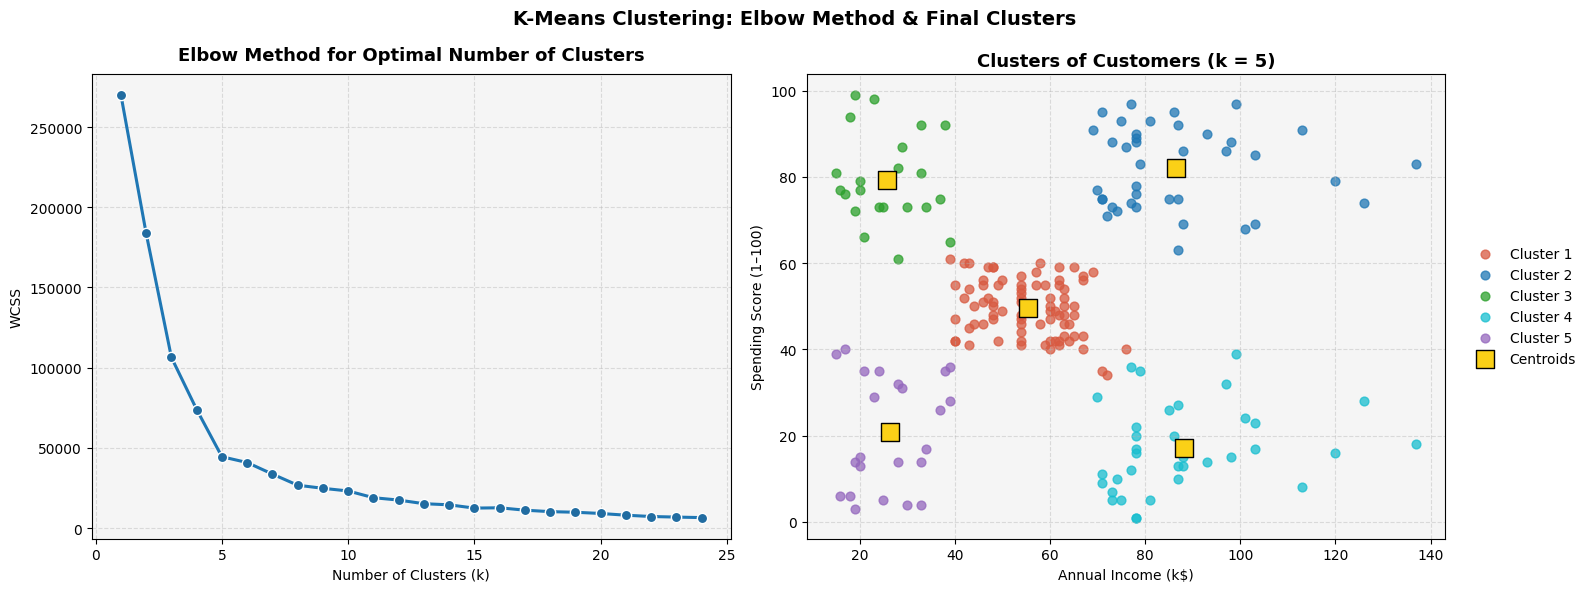

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from matplotlib.patches import Patch

# =====================================================
# Load data
# =====================================================
dataset = pd.read_csv("test_datasets/Clustering_Data.csv")
X = dataset.iloc[:, [3, 4]].values   # Annual Income & Spending Score


# =====================================================
# Elbow Method
# =====================================================
wcss = []
k_range = range(1, 25)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        random_state=42
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


# =====================================================
# KMeans Clustering (chosen k = 5)
# =====================================================
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)


# =====================================================
# Visualization
# =====================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ---------- Elbow Plot ----------
ax = axes[0]
ax.set_facecolor("whitesmoke")

ax.plot(
    k_range,
    wcss,
    marker="o",
    markersize=6,
    linewidth=2.2,
    color="#1f77b4"
)

ax.scatter(
    k_range,
    wcss,
    s=55,
    color="#216ca1",
    edgecolor="white",
    zorder=3
)

ax.set_title(
    "Elbow Method for Optimal Number of Clusters",
    fontsize=13,
    fontweight="bold",
    pad=10
)
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("WCSS")

ax.grid(True, linestyle="--", alpha=0.4)


# ---------- Cluster Plot ----------
ax = axes[1]
ax.set_facecolor("whitesmoke")

colors = ["#d85a41", "#1f77b4", "#2ca02c", "#17becf", "#9467bd"]

for i, color in enumerate(colors):
    points = X[y_kmeans == i]
    ax.scatter(
        points[:, 0],
        points[:, 1],
        s=40,
        color=color,
        alpha=0.75,
        label=f"Cluster {i+1}"
    )

# Centroids
ax.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=180,
    marker="s",
    c="#fad017",
    edgecolor="black",
    linewidth=1.0,
    label="Centroids",
    zorder=10
)

ax.set_title("Clusters of Customers (k = 5)", fontsize=13, fontweight="bold")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1–100)")

ax.legend(
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)
ax.grid(True, linestyle="--", alpha=0.4)

# ---------- Overall ----------
plt.suptitle(
    "K-Means Clustering: Elbow Method & Final Clusters",
    fontsize=14,
    fontweight="bold"
)

plt.tight_layout()
plt.show()

## Hierarchical Clustering

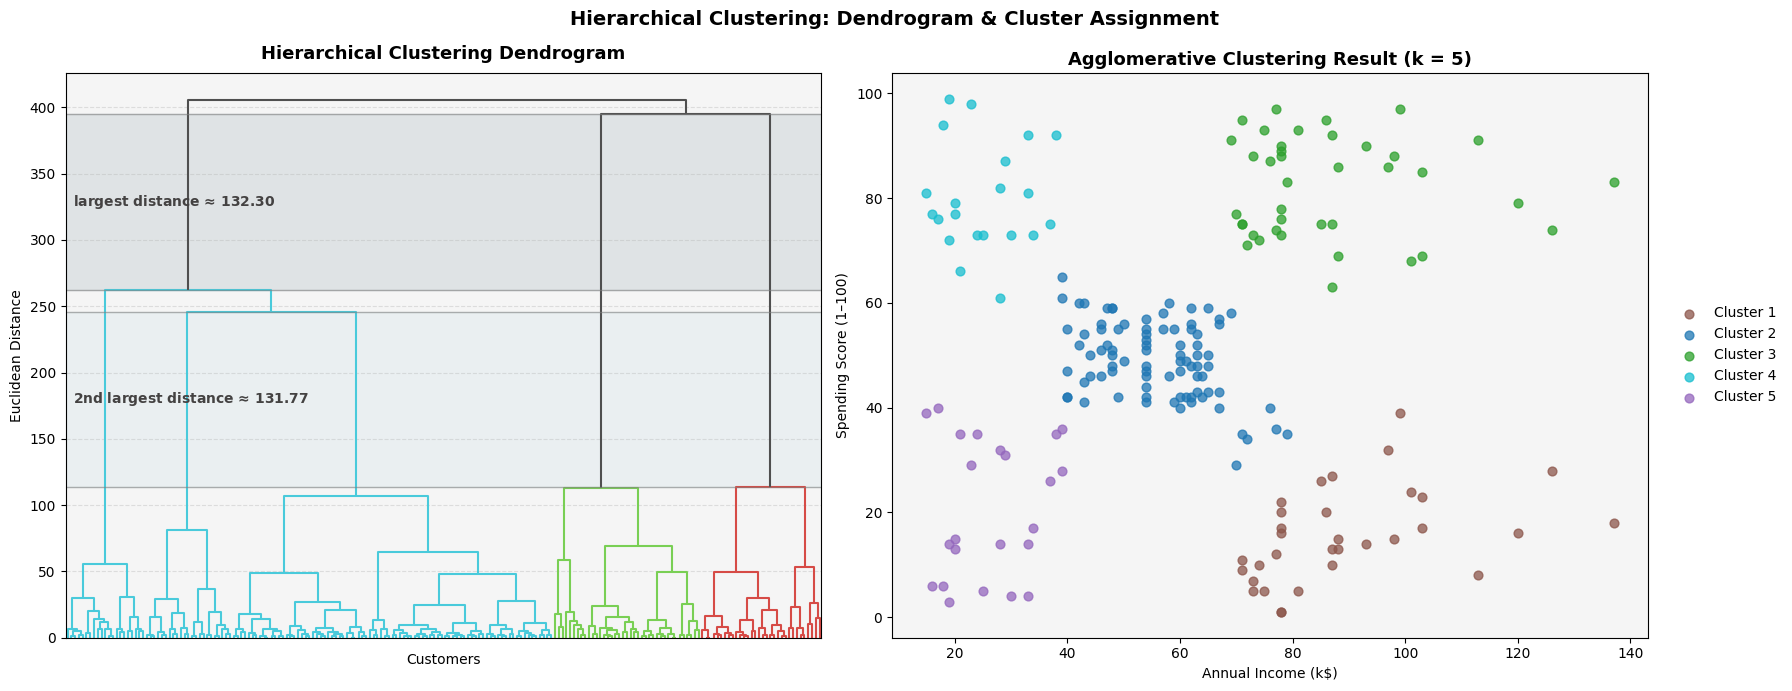

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering
from matplotlib.patches import Patch

# =====================================================
# Load data
# =====================================================
dataset = pd.read_csv("test_datasets/Clustering_Data.csv")
X = dataset.iloc[:, [3, 4]].values   # Annual Income & Spending Score

# =====================================================
# Hierarchical Clustering: Linkage + Gap Analysis
# =====================================================
Z = sch.linkage(X, method="ward")

d = Z[:, 2]               # merge heights
gaps = np.diff(d)         # vertical gaps
top2_idx = np.argsort(gaps)[-2:][::-1]

bands = []
for idx in top2_idx:
    y_low = d[idx]
    y_high = d[idx + 1]
    bands.append((y_low, y_high, y_high - y_low))


# =====================================================
# Agglomerative Clustering (chosen k = 5)
# =====================================================
hc = AgglomerativeClustering(n_clusters=5, linkage="ward")
y_hc = hc.fit_predict(X)


# =====================================================
# Visualization
# =====================================================
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# ---------- Dendrogram ----------
ax = axes[0]
ax.set_facecolor("whitesmoke")

sch.set_link_color_palette([
    "#49cadb",  # muted blue
    "#79cf54",  # muted green
    "#d64b46"   # muted red
])

sch.dendrogram(
    Z,
    ax=ax,
    color_threshold=None,
    above_threshold_color="#4f4f4f"
)

ax.set_title(
    "Hierarchical Clustering Dendrogram",
    fontsize=13,
    fontweight="bold",
    pad=10
)
ax.set_xlabel("Customers")
ax.set_ylabel("Euclidean Distance")
ax.set_xticklabels([])
ax.grid(True, axis="y", linestyle="--", alpha=0.35)

# Mark largest & second largest distances
band_styles = [
    ("#BFCACF", 0.40, r"$\bf{largest\ distance}$"),
    ("#D7E6EC", 0.35, r"$\bf{2nd\ largest\ distance}$"),
]

for (y_low, y_high, gap), (col, alpha, label) in zip(bands, band_styles):
    ax.axhspan(y_low, y_high, color=col, alpha=alpha, zorder=0)
    ax.axhline(y_low, color="gray", linewidth=1.0, alpha=0.6)
    ax.axhline(y_high, color="gray", linewidth=1.0, alpha=0.6)

    ax.text(
        0.01,
        (y_low + y_high) / 2,
        f"{label} ≈ {gap:.2f}",
        transform=ax.get_yaxis_transform(),
        va="center",
        fontsize=10,
        fontweight="bold",
        color="#444242"
    )


# ---------- Cluster Scatter ----------
ax = axes[1]
ax.set_facecolor("whitesmoke")

colors = ["#8c564b", "#1f77b4", "#2ca02c", "#17becf", "#9467bd"]

for i, color in enumerate(colors):
    points = X[y_hc == i]
    ax.scatter(
        points[:, 0],
        points[:, 1],
        s=40,
        color=color,
        alpha=0.75,
        label=f"Cluster {i+1}"
    )

ax.set_title(
    "Agglomerative Clustering Result (k = 5)",
    fontsize=13,
    fontweight="bold"
)
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1–100)")

ax.legend(
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)


# ---------- Overall ----------
plt.suptitle(
    "Hierarchical Clustering: Dendrogram & Cluster Assignment",
    fontsize=14,
    fontweight="bold"
)

plt.tight_layout()
plt.show()

# Association Rule Learning

## Apriori ARL

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from apyori import apriori

# =====================================================
# Load & prepare data
# =====================================================
dataset = pd.read_csv("test_datasets/ARL_Data.csv", header=None)

transactions = [
    [str(item) for item in row if pd.notna(item)]
    for row in dataset.values
]

# =====================================================
# Train Apriori model
# =====================================================
rules = apriori(
    transactions=transactions,
    min_support=0.003,
    min_confidence=0.2,
    min_lift=3,
    min_length=2,
    max_length=2
)

results = list(rules)

# =====================================================
# Convert results to DataFrame
# =====================================================
def results_to_dataframe(results):
    rows = []
    for result in results:
        support = result.support
        for ordered_stat in result.ordered_statistics:
            lhs = ", ".join(ordered_stat.items_base)
            rhs = ", ".join(ordered_stat.items_add)
            confidence = ordered_stat.confidence
            lift = ordered_stat.lift

            rows.append([lhs, rhs, support, confidence, lift])

    return pd.DataFrame(
        rows,
        columns=["LHS", "RHS", "Support", "Confidence", "Lift"]
    )

rules_df = results_to_dataframe(results)

# Top rules by lift
top_rules = rules_df.sort_values("Lift", ascending=False).head(10)
top_rules

,LHS,RHS,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


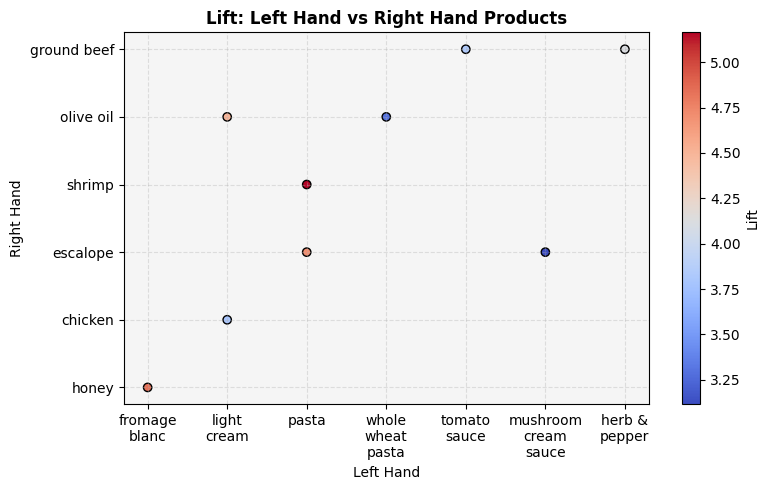

In [40]:
import textwrap
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

scatter = plt.scatter(
    top_rules["LHS"],
    top_rules["RHS"],
    c=rules_df["Lift"],
    cmap="coolwarm",
    alpha=1,
    edgecolor="k"
)

plt.colorbar(scatter, label="Lift")

plt.title(
    "Lift: Left Hand vs Right Hand Products",
    fontweight="bold"
)
plt.xlabel("Left Hand")
plt.ylabel("Right Hand")

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, linestyle="--", alpha=0.35)

# -------------------
# 🔹 Textwrap für X-Achse
# -------------------
ax = plt.gca()
labels = [tick.get_text() for tick in ax.get_xticklabels()]
wrapped_labels = [
    "\n".join(textwrap.wrap(label, width=10))
    for label in labels
]
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()


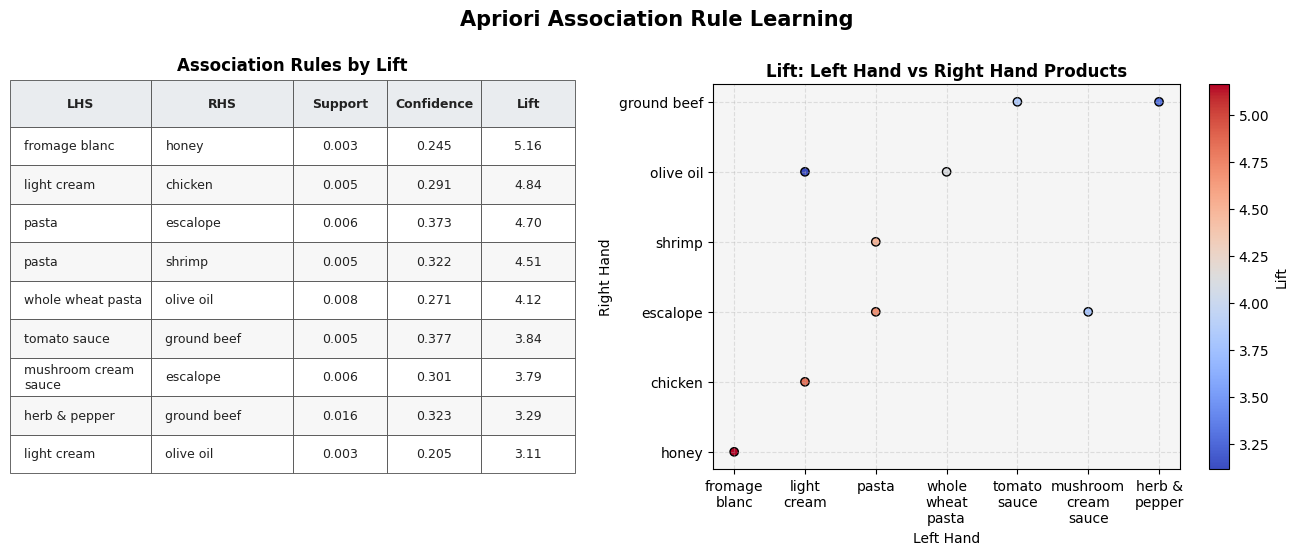

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

from apyori import apriori

# =====================================================
# Load & prepare data
# =====================================================
dataset = pd.read_csv("test_datasets/ARL_Data.csv", header=None)

transactions = [
    [str(item) for item in row if pd.notna(item)]
    for row in dataset.values
]

# =====================================================
# Train Apriori model
# =====================================================
rules = apriori(
    transactions=transactions,
    min_support=0.003,
    min_confidence=0.2,
    min_lift=3,
    min_length=2,
    max_length=2
)

results = list(rules)

# =====================================================
# Convert results to DataFrame
# =====================================================
def results_to_dataframe(results):
    rows = []
    for result in results:
        support = result.support
        for ordered_stat in result.ordered_statistics:
            lhs = ", ".join(ordered_stat.items_base)
            rhs = ", ".join(ordered_stat.items_add)
            confidence = ordered_stat.confidence
            lift = ordered_stat.lift

            rows.append([lhs, rhs, support, confidence, lift])

    return pd.DataFrame(
        rows,
        columns=["LHS", "RHS", "Support", "Confidence", "Lift"]
    )

rules_df = results_to_dataframe(results)

# Top rules by lift
top_rules = rules_df.sort_values("Lift", ascending=False).head(10)

# -------------------
# Helper: wrap long strings
# -------------------
def wrap_series(s: pd.Series, width: int = 16) -> pd.Series:
    return s.fillna("").astype(str).apply(lambda x: "\n".join(textwrap.wrap(x, width=width)))

# -------------------
# Make pretty table + scatter in one figure
# -------------------
def plot_top_rules_table_and_scatter(top_rules: pd.DataFrame, rules_df: pd.DataFrame, wrap_width: int = 16):
    # copy for display
    tbl = top_rules.copy()

    # wrap long text columns
    tbl["LHS"] = wrap_series(tbl["LHS"], width=wrap_width)
    tbl["RHS"] = wrap_series(tbl["RHS"], width=wrap_width)

    # format numeric columns
    if "Support" in tbl.columns:
        tbl["Support"] = tbl["Support"].astype(float).map(lambda x: f"{x:.3f}")
    if "Confidence" in tbl.columns:
        tbl["Confidence"] = tbl["Confidence"].astype(float).map(lambda x: f"{x:.3f}")
    if "Lift" in tbl.columns:
        tbl["Lift"] = tbl["Lift"].astype(float).map(lambda x: f"{x:.2f}")

    fig, axes = plt.subplots(1, 2, figsize=(16, 5), gridspec_kw={"width_ratios": [1.25, 1.55], "wspace": 0.35})
    fig.suptitle("Apriori Association Rule Learning", fontsize=15, fontweight="bold", y=1.03)
    ax_table, ax_plot = axes

    # -------------------
    # TABLE (left)
    # -------------------
    ax_table.axis("off")
    ax_table.set_title("Association Rules by Lift", fontweight="bold", pad=10)

    col_labels = ["LHS", "RHS", "Support", "Confidence", "Lift"]
    cell_text = tbl[col_labels].values.tolist()

    table = ax_table.table(
        cellText=cell_text,
        colLabels=col_labels,
        cellLoc="left",
        colLoc="center",
        loc="center",
    )

    # table styling
    table.auto_set_font_size(False)
    table.set_fontsize(9)

    # column widths (relative inside the table)
    # make LHS/RHS wider for readability
    col_widths = {0: 0.3, 1: 0.3, 2: 0.20, 3: 0.2, 4: 0.2}

    n_rows = len(tbl) + 1
    n_cols = len(col_labels)

    for r in range(n_rows):
        for c in range(n_cols):
            cell = table[(r, c)]
            cell.set_edgecolor("#4f4f4f")
            cell.set_linewidth(0.6)

            # set widths
            if c in col_widths:
                cell.set_width(col_widths[c])

            # header row
            if r == 0:
                cell.set_facecolor("#e9ecef")   # light header
                cell.set_text_props(weight="bold", color="#222222", ha="center", va="center")
                cell.set_height(0.12)
            else:
                # zebra rows
                cell.set_facecolor("#f7f7f7" if r % 2 == 0 else "white")
                cell.set_text_props(color="#222222", va="center")
                # a bit higher rows so wrapped text fits
                cell.set_height(0.10)

                # align numeric columns center
                if c in (2, 3, 4):
                    cell.get_text().set_ha("center")
                else:
                    cell.get_text().set_ha("left")

    # subtle background behind the table
    ax_table.set_facecolor("whitesmoke")

    # -------------------
    # SCATTER (right)
    # -------------------
    ax_plot.set_title("Lift: Left Hand vs Right Hand Products", fontweight="bold")
    ax_plot.set_facecolor("whitesmoke")

    # Use *original* (unwrapped) labels in the plot, but wrap x tick labels
    scatter = ax_plot.scatter(
        top_rules["LHS"],
        top_rules["RHS"],
        c=top_rules["Lift"],          
        cmap="coolwarm",
        alpha=1,
        edgecolor="k"
    )
    cbar = fig.colorbar(scatter, ax=ax_plot)
    cbar.set_label("Lift")

    ax_plot.set_xlabel("Left Hand")
    ax_plot.set_ylabel("Right Hand")
    ax_plot.grid(True, linestyle="--", alpha=0.35)

    # wrap x-axis tick labels
    xticks = ax_plot.get_xticks()
    xlabels = [t.get_text() for t in ax_plot.get_xticklabels()]
    wrapped = ["\n".join(textwrap.wrap(lbl, width=10)) for lbl in xlabels]
    ax_plot.set_xticks(xticks)
    ax_plot.set_xticklabels(wrapped)

    #plt.tight_layout()
    plt.show()


# -------------------
# Call it
# -------------------
plot_top_rules_table_and_scatter(top_rules, rules_df, wrap_width=18)

## Eclat ARL

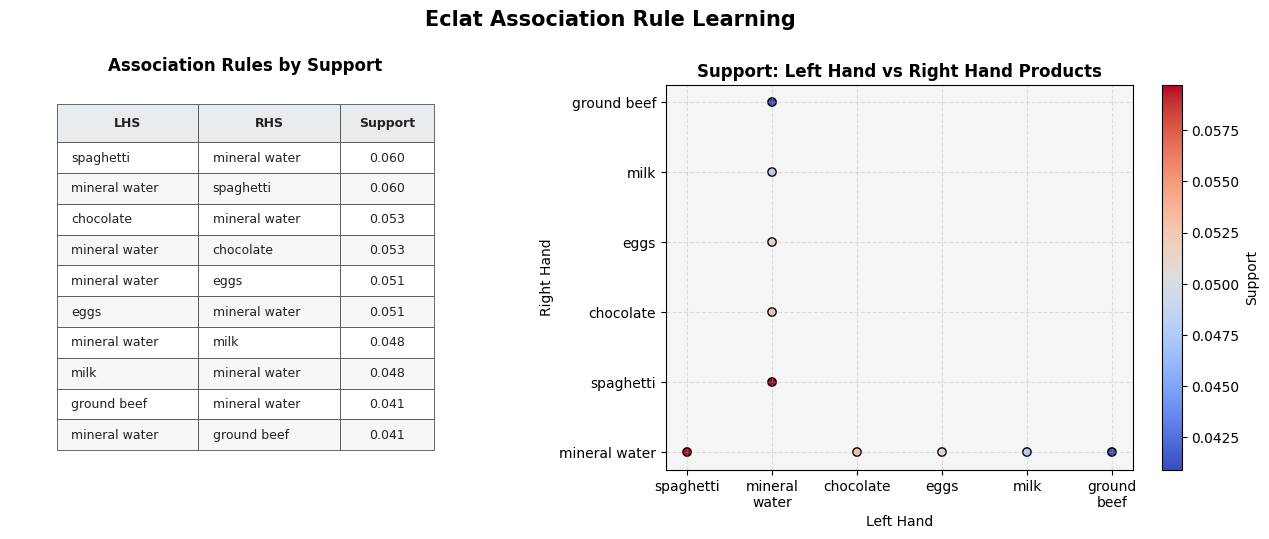

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

from apyori import apriori

# =====================================================
# Load & prepare data
# =====================================================
dataset = pd.read_csv("test_datasets/ARL_Data.csv", header=None)

transactions = [
    [str(item) for item in row if pd.notna(item)]
    for row in dataset.values
]

# =====================================================
# Train Apriori model
# =====================================================
rules = apriori(
    transactions=transactions,
    min_support=0.003,
    min_length=2,
    max_length=2
)

results = list(rules)

# =====================================================
# Convert results to DataFrame
# =====================================================
def results_to_dataframe(results):
    rows = []

    for result in results:
        support = result.support

        for ordered_stat in result.ordered_statistics:
            if not ordered_stat.items_base or not ordered_stat.items_add:
                continue

            lhs = ", ".join(sorted(ordered_stat.items_base))
            rhs = ", ".join(sorted(ordered_stat.items_add))

            rows.append([lhs, rhs, support])

    return pd.DataFrame(
        rows,
        columns=["LHS", "RHS", "Support"]
    )

rules_df = results_to_dataframe(results)

# Top rules by lift
top_rules = rules_df.sort_values("Support", ascending=False).head(10)

# -------------------
# Helper: wrap long strings
# -------------------
def wrap_series(s: pd.Series, width: int = 16) -> pd.Series:
    return s.fillna("").astype(str).apply(lambda x: "\n".join(textwrap.wrap(x, width=width)))

# -------------------
# Make pretty table + scatter in one figure
# -------------------
def plot_top_rules_table_and_scatter(top_rules: pd.DataFrame, rules_df: pd.DataFrame, wrap_width: int = 16):
    # copy for display
    tbl = top_rules.copy()

    # wrap long text columns
    tbl["LHS"] = wrap_series(tbl["LHS"], width=wrap_width)
    tbl["RHS"] = wrap_series(tbl["RHS"], width=wrap_width)

    # format numeric columns
    if "Support" in tbl.columns:
        tbl["Support"] = tbl["Support"].astype(float).map(lambda x: f"{x:.3f}")

    fig, axes = plt.subplots(1, 2, figsize=(16, 5), gridspec_kw={"width_ratios": [1.25, 1.55], "wspace": 0.35})
    fig.suptitle("Eclat Association Rule Learning", fontsize=15, fontweight="bold", y=1.03)
    ax_table, ax_plot = axes

    # -------------------
    # TABLE (left)
    # -------------------
    ax_table.axis("off")
    ax_table.set_title("Association Rules by Support", fontweight="bold", pad=10)

    col_labels = ["LHS", "RHS", "Support"]
    cell_text = tbl[col_labels].values.tolist()

    table = ax_table.table(
        cellText=cell_text,
        colLabels=col_labels,
        cellLoc="left",
        colLoc="center",
        loc="center",
    )

    # table styling
    table.auto_set_font_size(False)
    table.set_fontsize(9)

    # column widths (relative inside the table)
    # make LHS/RHS wider for readability
    col_widths = {0: 0.3, 1: 0.3, 2: 0.20}

    n_rows = len(tbl) + 1
    n_cols = len(col_labels)

    for r in range(n_rows):
        for c in range(n_cols):
            cell = table[(r, c)]
            cell.set_edgecolor("#4f4f4f")
            cell.set_linewidth(0.6)

            # set widths
            if c in col_widths:
                cell.set_width(col_widths[c])

            # header row
            if r == 0:
                cell.set_facecolor("#e9ecef")   # light header
                cell.set_text_props(weight="bold", color="#222222", ha="center", va="center")
                cell.set_height(0.1)
            else:
                # zebra rows
                cell.set_facecolor("#f7f7f7" if r % 2 == 0 else "white")
                cell.set_text_props(color="#222222", va="center")
                # a bit higher rows so wrapped text fits
                cell.set_height(0.08)

                # align numeric columns center
                if c == 2:
                    cell.get_text().set_ha("center")
                else:
                    cell.get_text().set_ha("left")

    # subtle background behind the table
    ax_table.set_facecolor("whitesmoke")

    # -------------------
    # SCATTER (right)
    # -------------------
    ax_plot.set_title("Support: Left Hand vs Right Hand Products", fontweight="bold")
    ax_plot.set_facecolor("whitesmoke")

    # Use *original* (unwrapped) labels in the plot, but wrap x tick labels
    scatter = ax_plot.scatter(
        top_rules["LHS"],
        top_rules["RHS"],
        c=top_rules["Support"],          
        cmap="coolwarm",
        alpha=1,
        edgecolor="k"
    )
    cbar = fig.colorbar(scatter, ax=ax_plot)
    cbar.set_label("Support")

    ax_plot.set_xlabel("Left Hand")
    ax_plot.set_ylabel("Right Hand")
    ax_plot.grid(True, linestyle="--", alpha=0.35)

    # wrap x-axis tick labels
    xticks = ax_plot.get_xticks()
    xlabels = [t.get_text() for t in ax_plot.get_xticklabels()]
    wrapped = ["\n".join(textwrap.wrap(lbl, width=10)) for lbl in xlabels]
    ax_plot.set_xticks(xticks)
    ax_plot.set_xticklabels(wrapped)

    #plt.tight_layout()
    plt.show()


# -------------------
# Call it
# -------------------
plot_top_rules_table_and_scatter(top_rules, rules_df, wrap_width=18)

# Reinforcement Learning

## Upper Confidence Bound

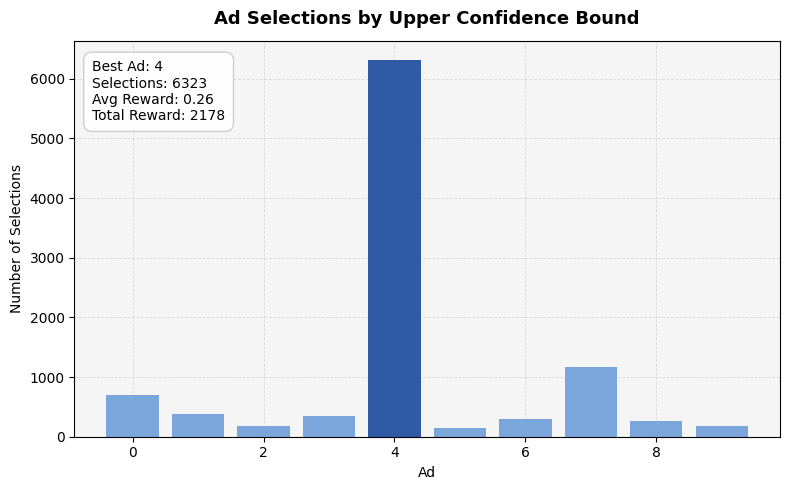

In [10]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =====================================================
# Load data & initialize
# =====================================================
dataset = pd.read_csv("test_datasets/UCB_Data.csv")

N = len(dataset)          # number of rounds
d = dataset.shape[1]      # number of ads (arms)
arm_ids = range(d)

counts = [0] * d          # number of selections per ad
reward_sums = [0.0] * d   # cumulative rewards per ad
total_reward = 0.0

# =====================================================
# UCB Algorithm
# =====================================================
for n in range(N):
    best_ad = 0
    best_ucb = -float("inf")

    for i in range(d):
        if counts[i] == 0:
            ucb = float("inf")  # force initial exploration
        else:
            avg_reward = reward_sums[i] / counts[i]
            confidence = math.sqrt(1.5 * math.log(n + 1) / counts[i])
            ucb = avg_reward + confidence

        if ucb > best_ucb:
            best_ucb = ucb
            best_ad = i

    # observe reward
    reward = dataset.iat[n, best_ad]

    counts[best_ad] += 1
    reward_sums[best_ad] += reward
    total_reward += reward

# =====================================================
# Results
# =====================================================
best_ad = int(np.argmax(counts))
best_ad_count = counts[best_ad]
best_ad_avg_reward = reward_sums[best_ad] / best_ad_count

# =====================================================
# Visualization
# =====================================================
plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.set_facecolor("whitesmoke")

# Bars
plt.bar(arm_ids, counts, color="#7aa6dc")
plt.bar(best_ad, counts[best_ad], color="#2f5aa6", label="Best Ad")

# Labels & title
plt.title("Ad Selections by Upper Confidence Bound", fontsize=13, fontweight="bold", pad=12)
plt.xlabel("Ad")
plt.ylabel("Number of Selections")

# Grid & styling
plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.4)
ax.set_axisbelow(True)

# -----------------------------------------------------
# Info box
# -----------------------------------------------------
info_text = (
    f"Best Ad: {best_ad}\n"
    f"Selections: {best_ad_count}\n"
    f"Avg Reward: {best_ad_avg_reward:.2f}\n"
    f"Total Reward: {int(total_reward)}"
)

plt.text(
    0.025, 0.95,
    info_text,
    transform=ax.transAxes,
    fontsize=10,
    va="top",
    ha="left",
    multialignment="left",
    bbox=dict(
        boxstyle="round,pad=0.6",
        facecolor="white",
        edgecolor="#cccccc",
        alpha=0.95
    )
)

plt.tight_layout()
plt.show()

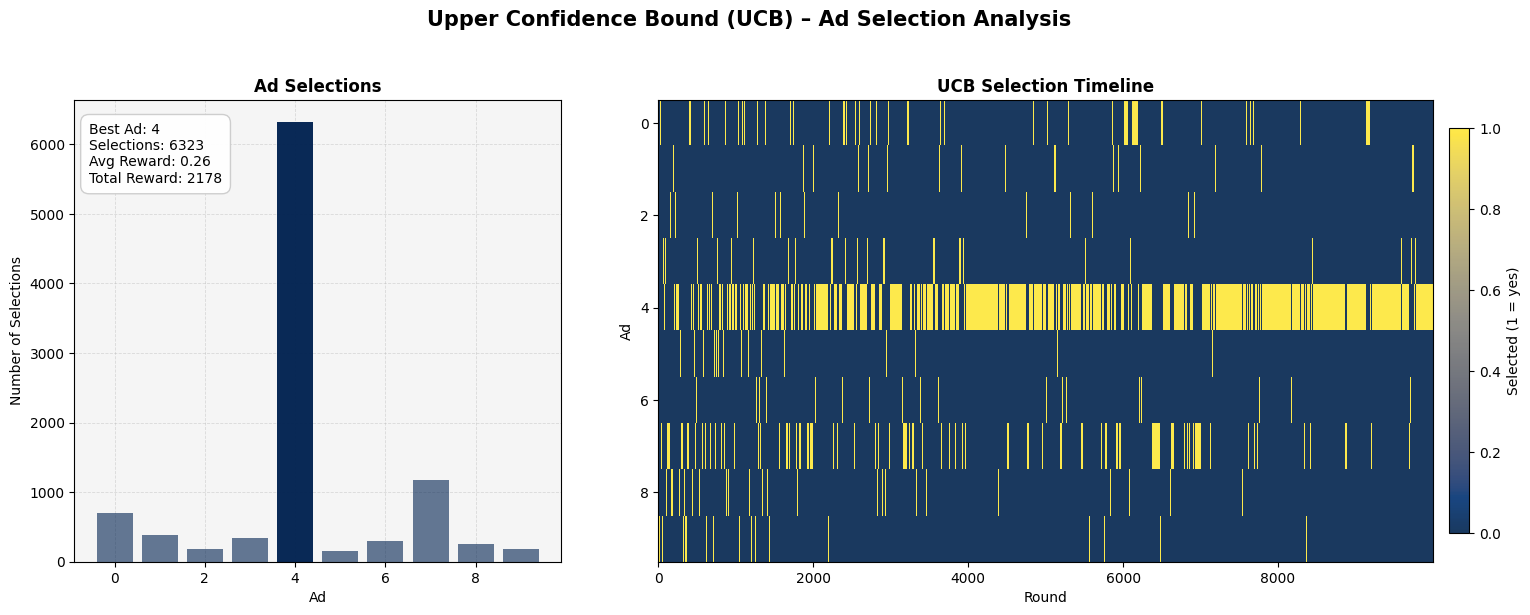

In [37]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =====================================================
# Load data & initialize
# =====================================================
dataset = pd.read_csv("test_datasets/UCB_Data.csv")

N = len(dataset)          # number of rounds
d = dataset.shape[1]      # number of ads (arms)
arm_ids = np.arange(d)

counts = [0] * d
reward_sums = [0.0] * d
total_reward = 0.0
ads_selected = []

# =====================================================
# UCB Algorithm
# =====================================================
for n in range(N):
    best_ad = 0
    best_ucb = -float("inf")

    for i in range(d):
        if counts[i] == 0:
            ucb = float("inf")   # force exploration
        else:
            avg_reward = reward_sums[i] / counts[i]
            confidence = math.sqrt(1.5 * math.log(n + 1) / counts[i])
            ucb = avg_reward + confidence

        if ucb > best_ucb:
            best_ucb = ucb
            best_ad = i

    reward = dataset.iat[n, best_ad]

    counts[best_ad] += 1
    reward_sums[best_ad] += reward
    total_reward += reward
    ads_selected.append(best_ad)

# =====================================================
# Results
# =====================================================
best_ad = int(np.argmax(counts))
best_ad_count = counts[best_ad]
best_ad_avg_reward = reward_sums[best_ad] / best_ad_count

# =====================================================
# Prepare timeline matrix
# =====================================================
sel = np.array(ads_selected)
timeline = np.zeros((d, N), dtype=int)
timeline[sel, np.arange(N)] = 1

# =====================================================
# Visualization: Combined Subplot
# =====================================================
fig, axes = plt.subplots(
    1, 2,
    figsize=(18, 6),
    gridspec_kw={"width_ratios": [1.2, 2.0], "wspace": 0.15}
)

fig.suptitle(
    "Upper Confidence Bound (UCB) – Ad Selection Analysis",
    fontsize=15,
    fontweight="bold",
    y=1.03
)

# -----------------------------------------------------
# LEFT: Bar chart (Ad selections)
# -----------------------------------------------------
ax_bar = axes[0]
ax_bar.set_facecolor("whitesmoke")

ax_bar.bar(arm_ids, counts, color="#002150", alpha=0.6)
ax_bar.bar(best_ad, counts[best_ad], color="#002150", alpha=0.9)

ax_bar.set_title("Ad Selections", fontweight="bold")
ax_bar.set_xlabel("Ad")
ax_bar.set_ylabel("Number of Selections")
ax_bar.grid(True, linestyle="--", linewidth=0.6, alpha=0.4)
ax_bar.set_axisbelow(True)

# Info box
info_text = (
    f"Best Ad: {best_ad}\n"
    f"Selections: {best_ad_count}\n"
    f"Avg Reward: {best_ad_avg_reward:.2f}\n"
    f"Total Reward: {int(total_reward)}"
)

ax_bar.text(
    0.03, 0.95,
    info_text,
    transform=ax_bar.transAxes,
    fontsize=10,
    va="top",
    ha="left",
    multialignment="left",
    bbox=dict(
        boxstyle="round,pad=0.6",
        facecolor="white",
        edgecolor="#cccccc",
        alpha=0.95
    )
)

# -----------------------------------------------------
# RIGHT: UCB timeline heatmap
# -----------------------------------------------------
ax_time = axes[1]

im = ax_time.imshow(
    timeline,
    aspect="auto",
    interpolation="nearest",
    cmap="cividis",
    alpha=0.9
)

ax_time.set_title("UCB Selection Timeline", fontweight="bold")
ax_time.set_xlabel("Round")
ax_time.set_ylabel("Ad")

cbar = fig.colorbar(im, ax=ax_time, fraction=0.025, pad=0.02)
cbar.set_label("Selected (1 = yes)")

#plt.tight_layout()
plt.show()

## Thompson Sampling

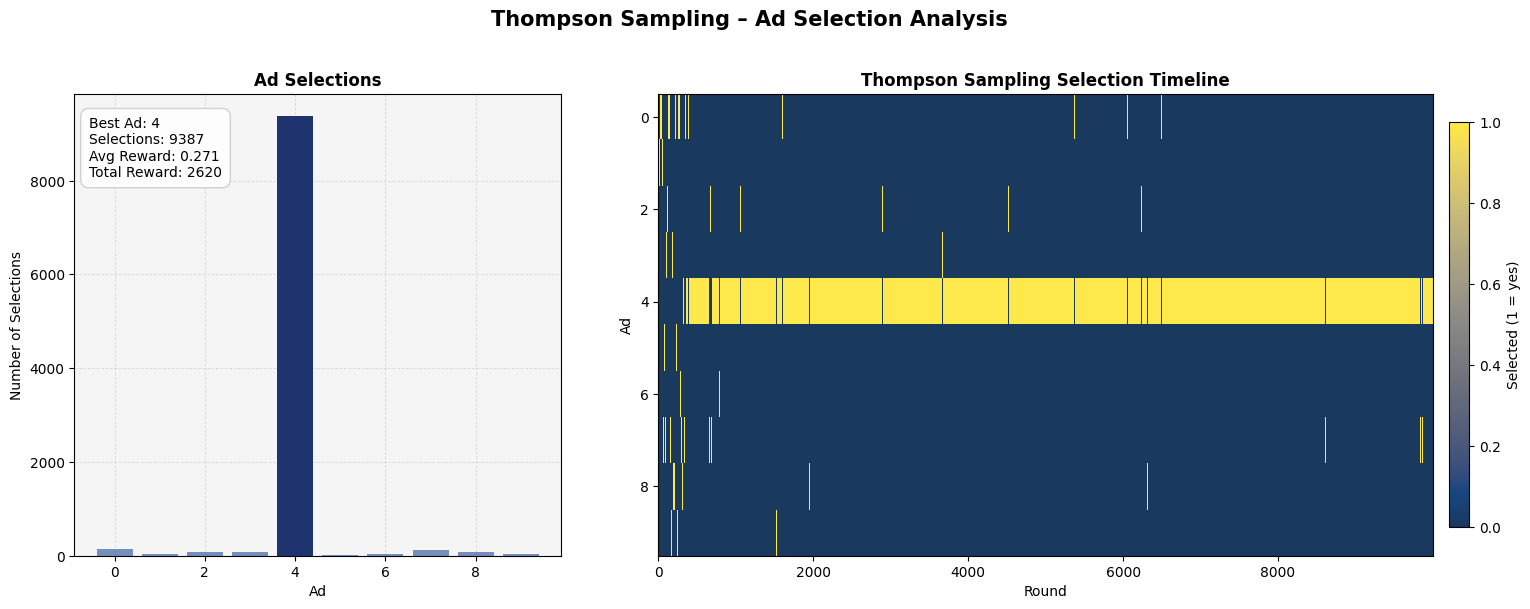

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =====================================================
# Load dataset
# =====================================================
dataset = pd.read_csv("test_datasets/UCB_Data.csv")

# =====================================================
# Initialize parameters
# =====================================================
N = len(dataset)              # number of rounds
d = dataset.shape[1]          # number of ads (arms)
arm_ids = np.arange(d)

# Beta distribution parameters for each arm
successes = np.zeros(d)
failures = np.zeros(d)

ads_selected = []
total_reward = 0

# =====================================================
# Thompson Sampling algorithm
# =====================================================
for n in range(N):

    # Sample from each Beta distribution
    sampled_theta = np.random.beta(successes + 1, failures + 1)

    # Select the ad with the highest sampled value
    best_ad = np.argmax(sampled_theta)

    # Observe reward
    reward = dataset.iat[n, best_ad]

    # Update Beta parameters
    if reward == 1:
        successes[best_ad] += 1
    else:
        failures[best_ad] += 1

    ads_selected.append(best_ad)
    total_reward += reward

# =====================================================
# Compute results
# =====================================================
counts = successes + failures
best_ad = int(np.argmax(counts))
best_ad_avg_reward = successes[best_ad] / counts[best_ad]

# =====================================================
# Create selection timeline matrix
# =====================================================
timeline = np.zeros((d, N), dtype=int)
timeline[ads_selected, np.arange(N)] = 1

# =====================================================
# Visualization: Combined subplot
# =====================================================
fig, axes = plt.subplots(
    1, 2,
    figsize=(18, 6),
    gridspec_kw={"width_ratios": [1.2, 2.0], "wspace": 0.15}
)

fig.suptitle(
    "Thompson Sampling – Ad Selection Analysis",
    fontsize=15,
    fontweight="bold",
    y=1.02
)

# -----------------------------------------------------
# LEFT: Bar chart (ad selections)
# -----------------------------------------------------
ax_bar = axes[0]
ax_bar.set_facecolor("whitesmoke")

ax_bar.bar(arm_ids, counts, color="#4062A3", alpha=0.7)
ax_bar.bar(best_ad, counts[best_ad], color="#1B2F6B", alpha=0.95)

ax_bar.set_title("Ad Selections", fontweight="bold")
ax_bar.set_xlabel("Ad")
ax_bar.set_ylabel("Number of Selections")
ax_bar.grid(True, linestyle="--", linewidth=0.6, alpha=0.4)
ax_bar.set_axisbelow(True)

# Info box
info_text = (
    f"Best Ad: {best_ad}\n"
    f"Selections: {int(counts[best_ad])}\n"
    f"Avg Reward: {best_ad_avg_reward:.3f}\n"
    f"Total Reward: {int(total_reward)}"
)

ax_bar.text(
    0.03, 0.95,
    info_text,
    transform=ax_bar.transAxes,
    fontsize=10,
    va="top",
    ha="left",
    bbox=dict(
        boxstyle="round,pad=0.6",
        facecolor="white",
        edgecolor="#cccccc",
        alpha=0.9
    )
)

# -----------------------------------------------------
# RIGHT: Selection timeline heatmap
# -----------------------------------------------------
ax_time = axes[1]

im = ax_time.imshow(
    timeline,
    aspect="auto",
    interpolation="nearest",
    cmap="cividis",
    alpha=0.9
)

ax_time.set_title("Thompson Sampling Selection Timeline", fontweight="bold")
ax_time.set_xlabel("Round")
ax_time.set_ylabel("Ad")

cbar = fig.colorbar(im, ax=ax_time, fraction=0.025, pad=0.02)
cbar.set_label("Selected (1 = yes)")

plt.show()

# Natural Language Processing

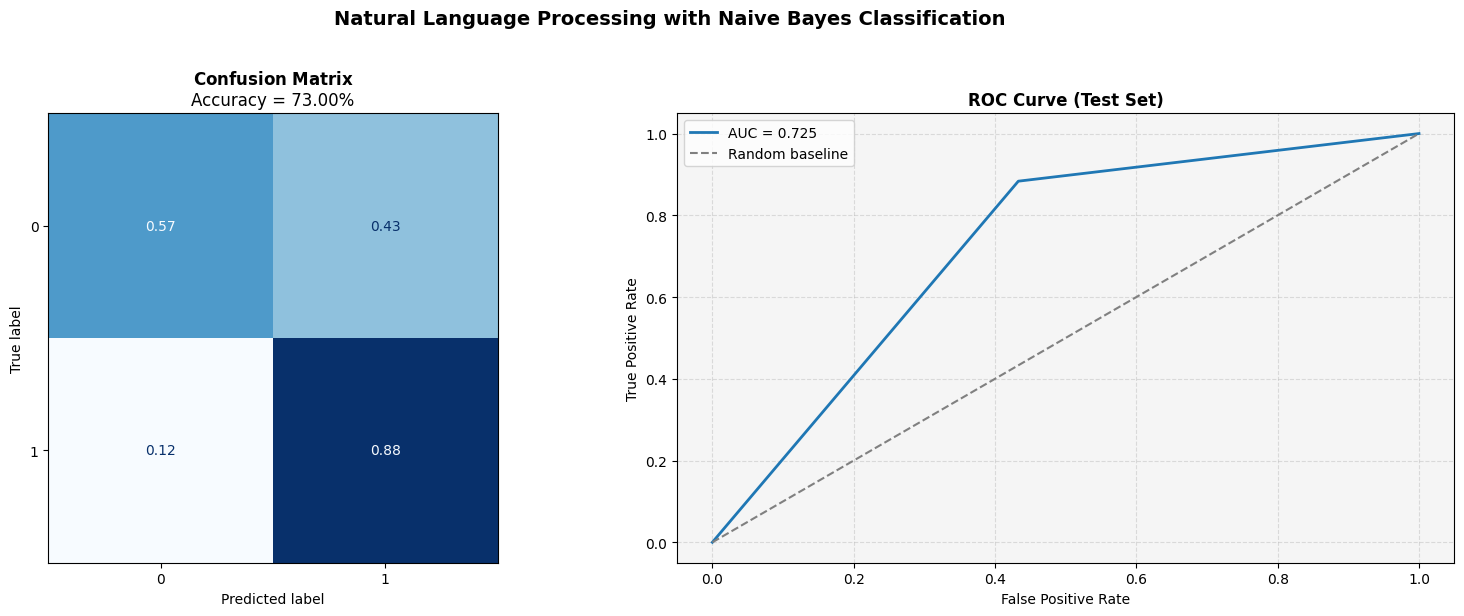

In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    roc_curve,
    auc
)

# =====================================================
# Load data
# =====================================================
df = pd.read_csv("test_datasets/NLP_Data.tsv", delimiter="\t", quoting=3)

# =====================================================
# Text Cleaning
# =====================================================
ps = PorterStemmer()
all_stopwords = set(stopwords.words("english"))
all_stopwords.remove("not")

corpus = []

for review in df["Review"][:1000]:
    review = re.sub("[^a-zA-Z]", " ", review)
    review = review.lower().split()
    review = [
        ps.stem(word)
        for word in review
        if word not in all_stopwords
    ]
    corpus.append(" ".join(review))

# =====================================================
# Bag of Words
# =====================================================
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:1000, -1].values

# =====================================================
# Train / Test Split
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0
)

# =====================================================
# Train Model
# =====================================================
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# =====================================================
# Predictions
# =====================================================
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)

# ROC values
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# =====================================================
# Combined Visualization
# =====================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(
    "Natural Language Processing with Naive Bayes Classification",
    fontsize=14,
    fontweight="bold",
    y=1.02
)

# -----------------------------------------------------
# LEFT: Confusion Matrix
# -----------------------------------------------------
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=axes[0],
    cmap="Blues",
    normalize="true",
    colorbar=False
)

axes[0].set_title(
    r"$\bf{Confusion\ Matrix}$" + f"\nAccuracy = {acc:.2%}"
)
axes[0].set_facecolor("whitesmoke")

# -----------------------------------------------------
# RIGHT: ROC Curve
# -----------------------------------------------------
axes[1].set_facecolor("whitesmoke")

axes[1].plot(
    fpr,
    tpr,
    linewidth=2,
    label=f"AUC = {roc_auc:.3f}"
)

axes[1].plot(
    [0, 1],
    [0, 1],
    linestyle="--",
    linewidth=1.5,
    color="gray",
    label="Random baseline"
)

axes[1].set_title("ROC Curve (Test Set)", fontweight="bold")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].grid(True, linestyle="--", alpha=0.4)
axes[1].legend()

plt.tight_layout()
plt.show()

C:\Users\Anwender\AppData\Local\Temp\ipykernel_28036\1386170732.py:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)
C:\Users\Anwender\AppData\Local\Temp\ipykernel_28036\1386170732.py:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


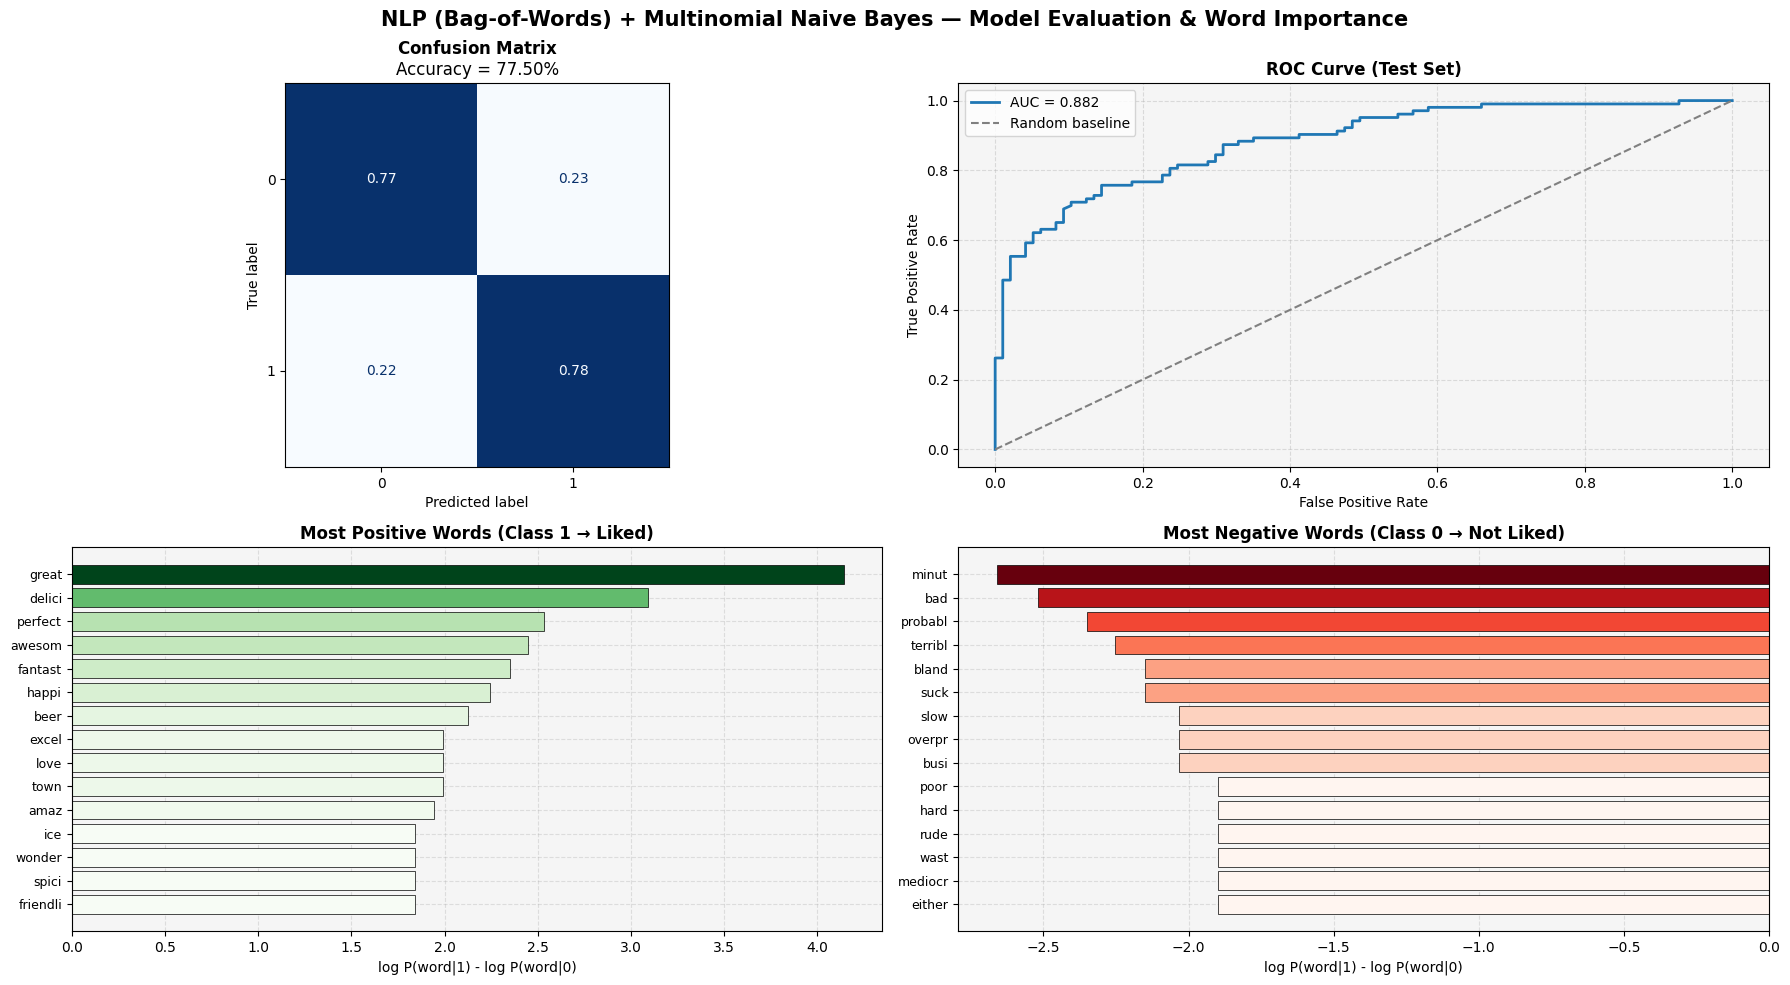

In [8]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, roc_curve, auc

# =====================================================
# Load data
# =====================================================
df = pd.read_csv("test_datasets/NLP_Data.tsv", delimiter="\t", quoting=3)

# =====================================================
# Text cleaning
# =====================================================
ps = PorterStemmer()
stop_words = set(stopwords.words("english"))
stop_words.remove("not")

corpus = []
for review in df["Review"][:1000]:
    review = re.sub("[^a-zA-Z]", " ", review).lower().split()
    review = [ps.stem(w) for w in review if w not in stop_words]
    corpus.append(" ".join(review))

# =====================================================
# Bag of Words
# =====================================================
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus)
y = df.iloc[:1000, -1].values

# =====================================================
# Train / Test split
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0
)

# =====================================================
# Model
# =====================================================
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# =====================================================
# Word importance (MultinomialNB)
# =====================================================
feature_names = np.array(cv.get_feature_names_out())
log_prob = classifier.feature_log_prob_              # shape: (2, n_features)
word_score = log_prob[1] - log_prob[0]              # pushes toward class 1 vs 0

top_n = 15
top_pos_idx = np.argsort(word_score)[-top_n:][::-1] # most positive
top_neg_idx = np.argsort(word_score)[:top_n]        # most negative

top_pos_words, top_pos_scores = feature_names[top_pos_idx], word_score[top_pos_idx]
top_neg_words, top_neg_scores = feature_names[top_neg_idx], word_score[top_neg_idx]

# =====================================================
# Helper: Styled horizontal barplot with colormap
# =====================================================
def plot_word_importance(ax, words, scores, title, cmap_name):
    words = words[::-1]
    scores = scores[::-1]

    norm = mcolors.Normalize(vmin=min(scores), vmax=max(scores))
    cmap = cm.get_cmap(cmap_name)
    colors = cmap(norm(scores))

    ax.set_facecolor("whitesmoke")
    ax.barh(
        range(len(words)),
        scores,
        color=colors,
        edgecolor="black",
        linewidth=0.5,
        height=0.8
    )

    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words, fontsize=9)
    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("log P(word|1) - log P(word|0)")
    ax.grid(True, linestyle="--", alpha=0.35)
    ax.set_axisbelow(True)

# =====================================================
# 2x2 Subplot Layout
# =====================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.set_facecolor("#ffffffef")
fig.suptitle(
    "NLP (Bag-of-Words) + Multinomial Naive Bayes — Model Evaluation & Word Importance",
    fontsize=15,
    fontweight="bold",
    y=0.98
)

# -----------------------------------------------------
# (1) Confusion Matrix
# -----------------------------------------------------
ax = axes[0, 0]
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=ax,
    cmap="Blues",
    normalize="true",
    colorbar=False
)
ax.set_title(r"$\bf{Confusion\ Matrix}$" + f"\nAccuracy = {acc:.2%}")
ax.set_facecolor("whitesmoke")

# -----------------------------------------------------
# (2) ROC Curve
# -----------------------------------------------------
ax = axes[0, 1]
ax.set_facecolor("whitesmoke")

ax.plot(
    fpr,
    tpr,
    linewidth=2,
    label=f"AUC = {roc_auc:.3f}",
    color="tab:blue"
)

ax.plot(
    [0, 1],
    [0, 1],
    linestyle="--",
    linewidth=1.5,
    color="gray",
    label="Random baseline"
)

ax.set_title("ROC Curve (Test Set)", fontweight="bold")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.grid(True, linestyle="--", alpha=0.4)
ax.legend()

# -----------------------------------------------------
# (3) Positive Words
# -----------------------------------------------------
plot_word_importance(
    axes[1, 0],
    top_pos_words,
    top_pos_scores,
    "Most Positive Words (Class 1 → Liked)",
    cmap_name="Greens"
)

# -----------------------------------------------------
# (4) Negative Words
# -----------------------------------------------------
plot_word_importance(
    axes[1, 1],
    top_neg_words,
    top_neg_scores,
    "Most Negative Words (Class 0 → Not Liked)",
    cmap_name="Reds_r"
)

plt.tight_layout()
plt.show()